# Zomato Restaurant

Project Description

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.

Country_code.csv contains two variables:
• Country code
• Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

• Restaurant Id: Unique id of every restaurant across various cities of the world

• Restaurant Name: Name of the restaurant

• Country Code: Country in which restaurant is located

• City: City in which restaurant is located

• Address: Address of the restaurant

• Locality: Location in the city

• Locality Verbose: Detailed description of the locality

• Longitude: Longitude coordinate of the restaurant&#39;s location

• Latitude: Latitude coordinate of the restaurant&#39;s location

• Cuisines: Cuisines offered by the restaurant

• Average Cost for two: Cost for two people in different currencies ��

• Currency: Currency of the country

• Has Table booking: yes/no

• Has Online delivery: yes/ no

• Is delivering: yes/ no

• Switch to order menu: yes/no

• Price range: range of price of food

• Aggregate Rating: Average rating out of 5

• Rating color: depending upon the average rating color

• Rating text: text on the basis of rating of rating

• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range


Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets


Dataset Link-  
•	https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx
•	https://github.com/dsrscientist/dataset4/blob/main/zomato.csv



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [4]:
!pip install imbalanced-learn

In [5]:
#importing dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv',sep=',', encoding='latin-1')

df

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karakí_y, ÛÁstanbul   28.977392   
9547                               Koôuyolu, ÛÁstanbul   29.041297   
9548                             Kuruí_eôme, ÛÁstanbul   29.034640   
9549                             Kuruí_eôme, ÛÁstanbul   29.036019   
9550                                    Moda, ÛÁstanbul   29.026016   

       Latitude                          Cuisines  ...          Currency  \
0     14.565443        French, Japanese, Desserts  ...  Botswana Pula(P)   
1     14.553708                          Japanese  ...  Botswana Pula(P)   
2     14.581404  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3     14.585318                   Japanese, Sushi  ...  Botswana Pula(P)   
4     14.584450                  Japanese, Korean  ...  Botswana Pula(P)   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...  Turkish Lira(TL)   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548  41.055817            Italian, World Cuisine  ...  Turkish Lira(TL)   
9549  41.057979                   Restaurant Cafe  ...  Turkish Lira(TL)   
9550  40.9

In [6]:
df1=pd.read_excel(r'C:\Users\aisha\OneDrive\Desktop\Country-Code.xlsx')

df1

Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States

In [7]:
# merging data to have one datafram to analyze. 

new_df = pd.merge(df,df1,on='Country Code',how='left')
new_df.head(2)


Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  ...  Has Table booking Has Online delivery  \
0  French, Japanese, Desserts  ...                Yes                  No   
1                    Japanese  ...                Yes                  No   

  Is delivering now Switch to order menu Price range Aggregate rating  \
0                No                   No           3              4.8   
1                No                   No           3              4.5   

   Rating color  Rating text Votes      Country  
0    Dark Green    Excellent   314  Phillipines  
1    Dark Green    Excellent   591  Phillipines  

[2 rows x 22 columns]

In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
new_df.shape

(9551, 22)

In [10]:
#check for null values

new_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [11]:
new_df['Cuisines'].fillna(new_df['Cuisines'].value_counts().index[0], inplace=True)


In [12]:
#checking for duplicate values

new_df.drop_duplicates(inplace=True)
new_df.shape

(9551, 22)

<AxesSubplot:>

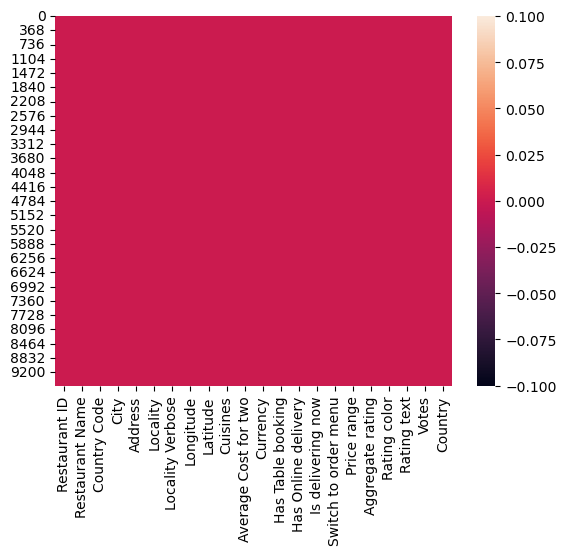

In [13]:
#lets visualize it using heatmap

sns.heatmap(new_df.isnull())

In [14]:
#Seperating Numerical and Categorical columns

#checking for categorical columns

categorical_col = []
for i in new_df.dtypes.index:
    if new_df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical Columns:",categorical_col)

#checking for numerical columns

numerical_col = []
for i in new_df.dtypes.index:
    if new_df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)



categorical Columns: ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']
Numerical Columns: ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


# # Exploratory Data Analysis

We have to dig into the data further as we need to preprocess data to predict two things:

1) Average Cost for two
2) Price range


In [15]:
#First we want to find out the location that serves the best cuisine 

print("Countries that have survey across \n")

for x in pd.unique(new_df['Country']): 
    
    print(x)
     

        
print('Total number of Countries',len(pd.unique(new_df['Country'])))

Countries that have survey across 

Phillipines
Brazil
United States
Australia
Canada
Singapore
UAE
India
Indonesia
New Zealand
United Kingdom
Qatar
South Africa
Sri Lanka
Turkey
Total number of Countries 15


In [16]:
#checking the value counts of each column

for i in new_df.columns:
    print(new_df[i].unique())
    print(f"Unique values in column '{i}':\n")

[6317637 6304287 6300002 ... 5915807 5916112 5927402]
Unique values in column 'Restaurant ID':

['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A\x81ô\x81ôk Kahve' "Walter's Coffee Roastery"]
Unique values in column 'Restaurant Name':

[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]
Unique values in column 'Country Code':

['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Brasí_lia'
 'Rio de Janeiro' 'Sí£o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Miller' 'Monroe' 'Montville'

# Univariate Analysis

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


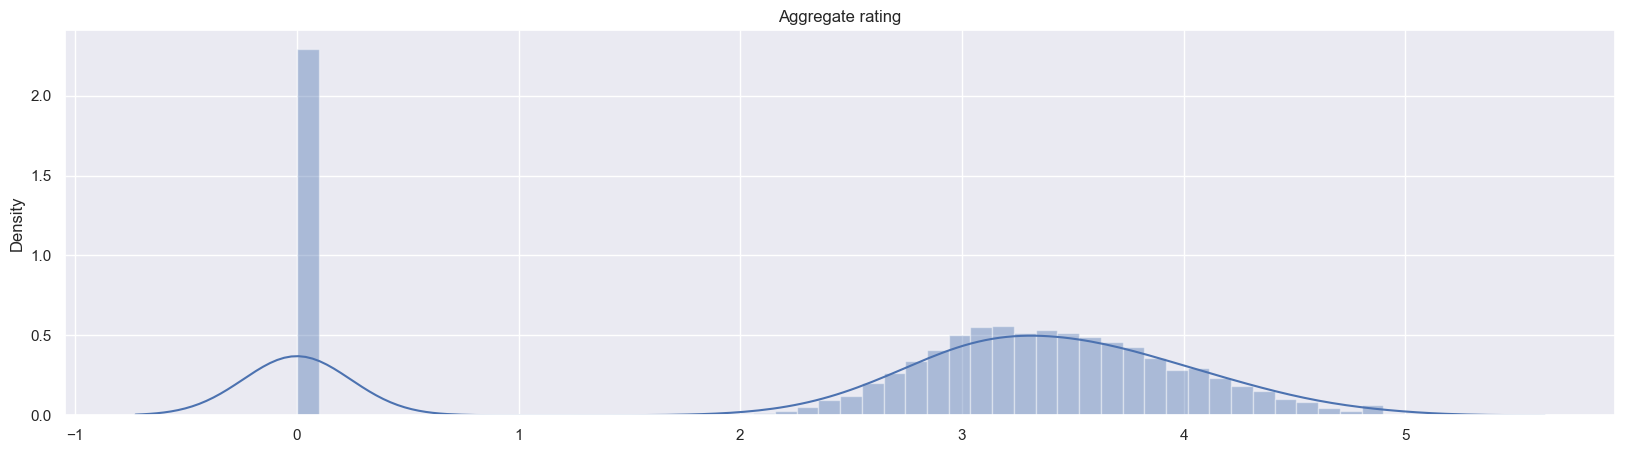

In [17]:
#Lets check the ratings of the cuisines, checking feature "aggregate ratings","Rating text","Rating color"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(new_df["Aggregate rating"], bins=50 , ax=ax1)
ax1.set_title("Aggregate rating")
ax1.set_xlabel(" ")
print(new_df['Aggregate rating'].value_counts())




We see there is are many ratings available but around 2148 ratings are 0

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64


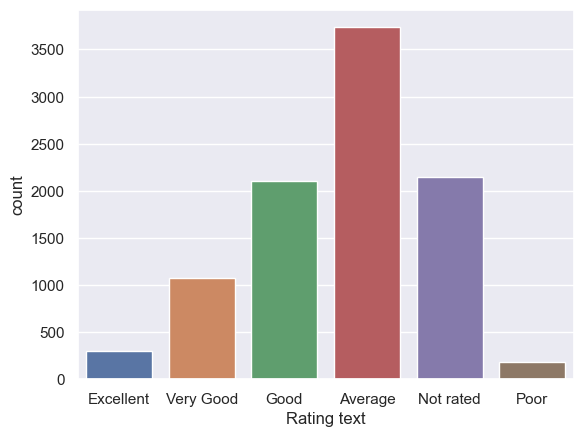

In [18]:
#visualize the Rating text

ax=sns.countplot(x= 'Rating text',data=new_df)
print(new_df['Rating text'].value_counts())


Rating color shows different colors, there more than 2000 not rated, Average rating has the highest numbers while the Excellent ratings are less than 500


Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64


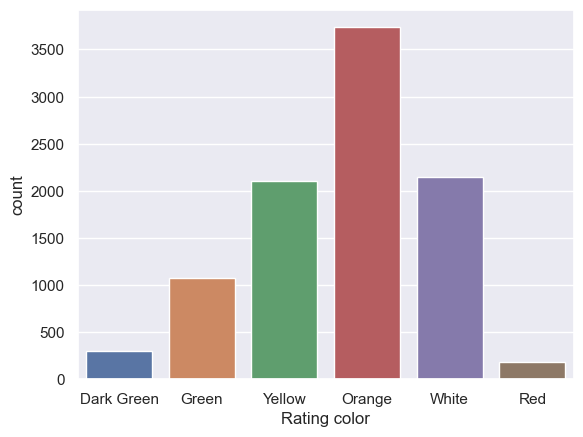

In [19]:
#visualize the Rating colors

ax=sns.countplot(x= 'Rating color',data=new_df)
print(new_df['Rating color'].value_counts())


In [20]:
df_group_rating = new_df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

df_group_rating

Aggregate rating Rating color Rating text  Rating Count
0                0.0        White   Not rated          2148
1                1.8          Red        Poor             1
2                1.9          Red        Poor             2
3                2.0          Red        Poor             7
4                2.1          Red        Poor            15
5                2.2          Red        Poor            27
6                2.3          Red        Poor            47
7                2.4          Red        Poor            87
8                2.5       Orange     Average           110
9                2.6       Orange     Average           191
10               2.7       Orange     Average           250
11               2.8       Orange     Average           315
12               2.9       Orange     Average           381
13               3.0       Orange     Average           468
14               3.1       Orange     Average           519
15               3.2       Orange     Average           522
16               3.3       Orange     Average           483
17               3.4       Orange     Average           498
18               3.5       Yellow        Good           480
19               3.6       Yellow        Good           458
20               3.7       Yellow        Good           427
21               3.8       Yellow        Good           400
22               3.9       Yellow        Good           335
23               4.0        Green   Very Good           266
24               4.1        Green   Very Good           274
25               4.2        Green   Very Good           221
26               4.3        Green   Very Good           174
27               4.4        Green   Very Good           144
28               4.5   Dark Green   Excellent            95
29               4.6   Dark Green   Excellent            78
30               4.7   Dark Green   Excellent            42
31               4.8   Dark Green   Excellent            25
32               4.9   Dark Green   Excellent            61

# Restaurant Ratings 

After observing the graphs of rating groupby we now know the criteria of each rating given below of the restaurants:

Rating 0 — White — Not rated
Rating 1.8 to 2.4 — Red — Poor
Rating 2.5 to 3.4 — Orange — Average
Rating 3.5 to 3.9 — Yellow — Good
Rating 4.0 to 4.4 — Green — Very Good
Rating 4.5 to 4.9 — Dark Green — Excellent


Let us try to understand the spread of rating across restaurants

North Indian                                             945
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64


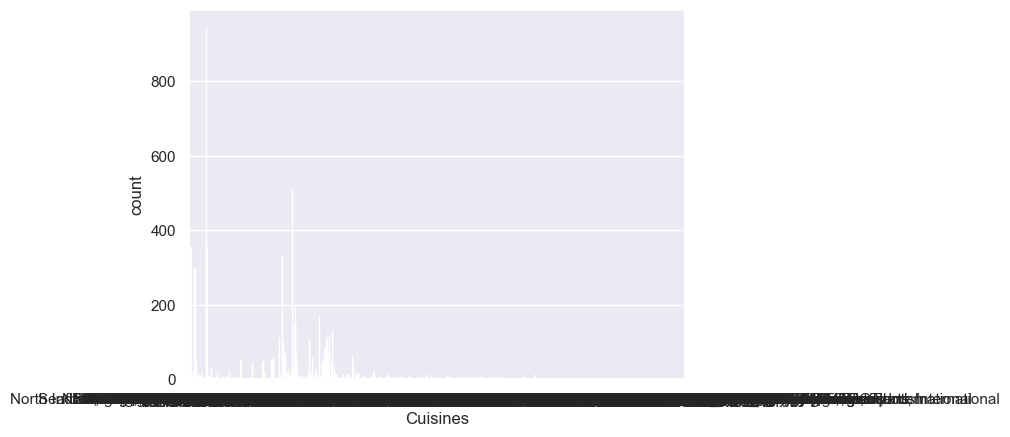

In [21]:
#visualize the Cuisine

ax=sns.countplot(x='Cuisines',data=new_df)
print(new_df['Cuisines'].value_counts())


Text(0.5, 0, ' ')

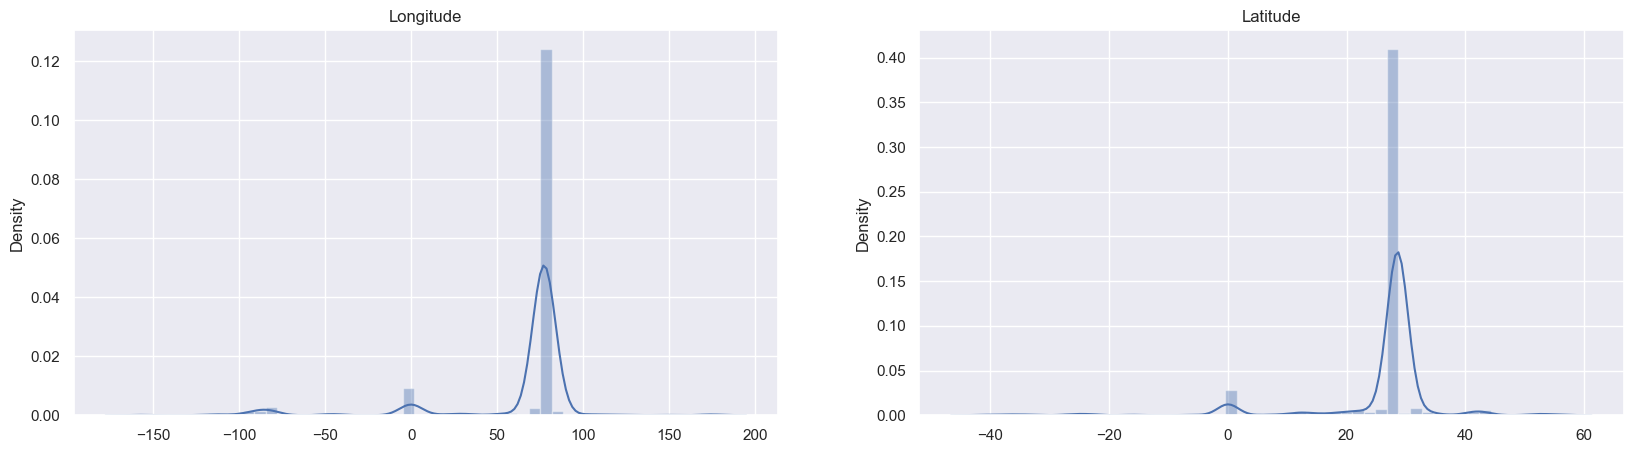

In [22]:
#visualize the number of Longitude and Latitude

sns.set(style="darkgrid")
plot_graph = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig, (ax1, ax2) = plot_graph

sns.distplot(new_df["Longitude"], bins=50 , ax=ax1)
ax1.set_title("Longitude")
ax1.set_xlabel(" ")

sns.distplot(new_df["Latitude"], bins=50 , ax=ax2)
ax2.set_title("Latitude")
ax2.set_xlabel(" ")


1. "Logitude" shows high skew data distribution with most value 50 to 100. 

2. "Latitude" shows high distribution between 20 to 40. 

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64


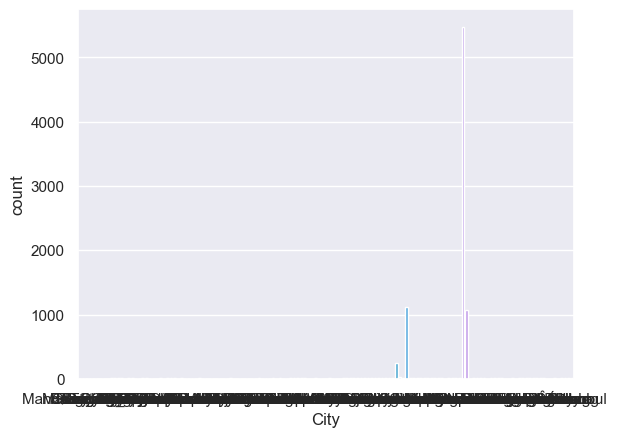

In [23]:
ax=sns.countplot(x= 'City',data=new_df)
print(new_df['City'].value_counts())


There are many unique values in Restaurant ID the features so we will remove this column

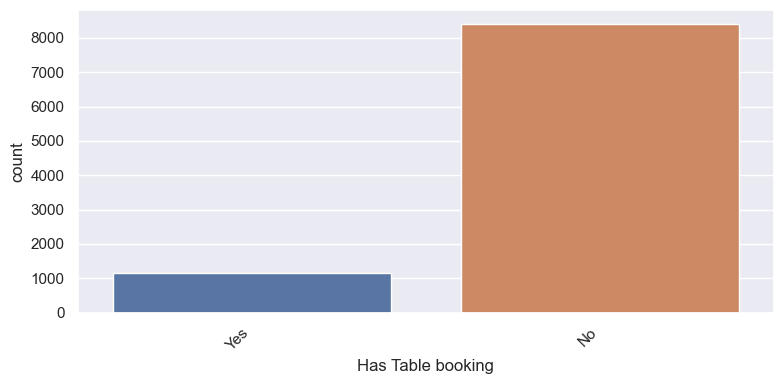

No     8393
Yes    1158
Name: Has Table booking, dtype: int64


In [24]:
#visualize the number of column:

plt.figure(figsize=(8,4))
ax=sns.countplot(x= 'Has Table booking',data=new_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.tight_layout()  # To ensure labels are fully visible
plt.show()
print(new_df['Has Table booking'].value_counts())


This feature shows that there are many people booking online

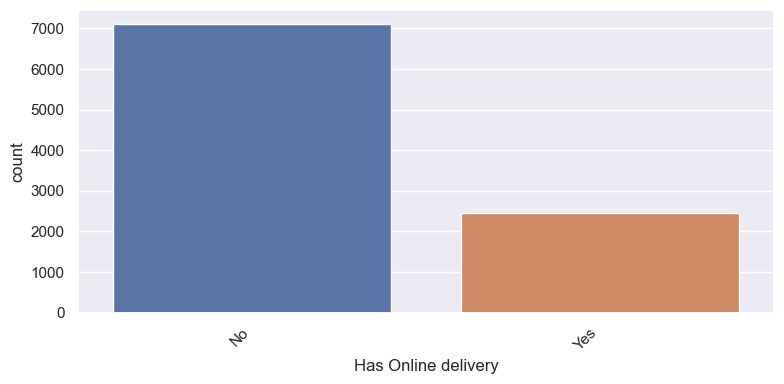

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64


In [25]:
#visualize the number of column:

plt.figure(figsize=(8,4))
ax=sns.countplot(x= 'Has Online delivery',data=new_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.tight_layout()  # To ensure labels are fully visible
plt.show()
print(new_df['Has Online delivery'].value_counts())


Many people are not having online delivery

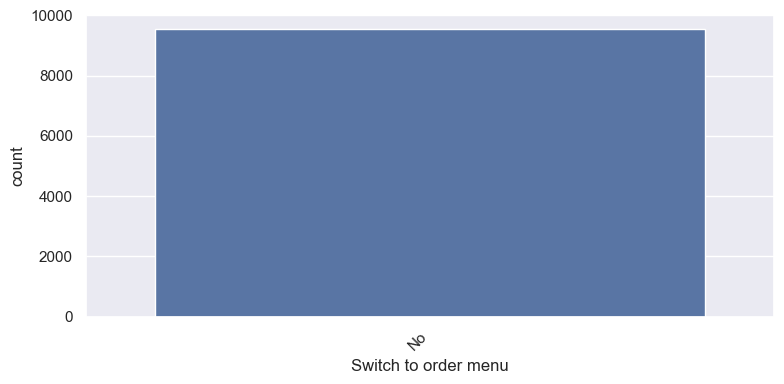

No    9551
Name: Switch to order menu, dtype: int64


In [26]:
#Lets check feature switch to order menu

plt.figure(figsize=(8,4))
ax=sns.countplot(x= 'Switch to order menu',data=new_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.tight_layout()  # To ensure labels are fully visible
plt.show()
print(new_df['Switch to order menu'].value_counts())


This graph shows same result that there is no one switch to order menu 

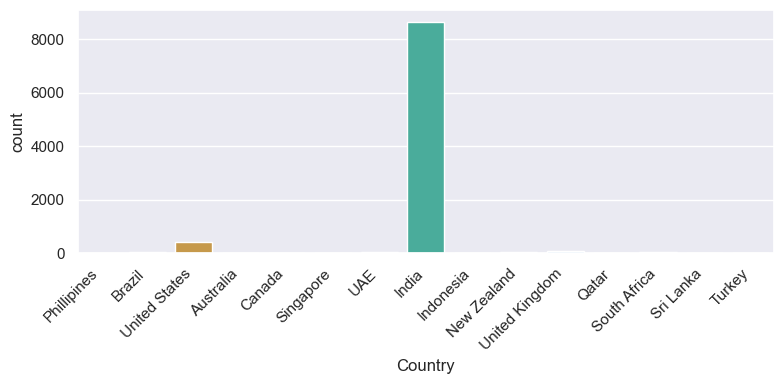

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64


In [27]:
#Lets check the graph of feature Country

plt.figure(figsize=(8,4))
ax=sns.countplot(x= 'Country',data=new_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.tight_layout()  # To ensure labels are fully visible
plt.show()
print(new_df['Country'].value_counts())

This graph shows that majority of the people using zomato are from India and United States

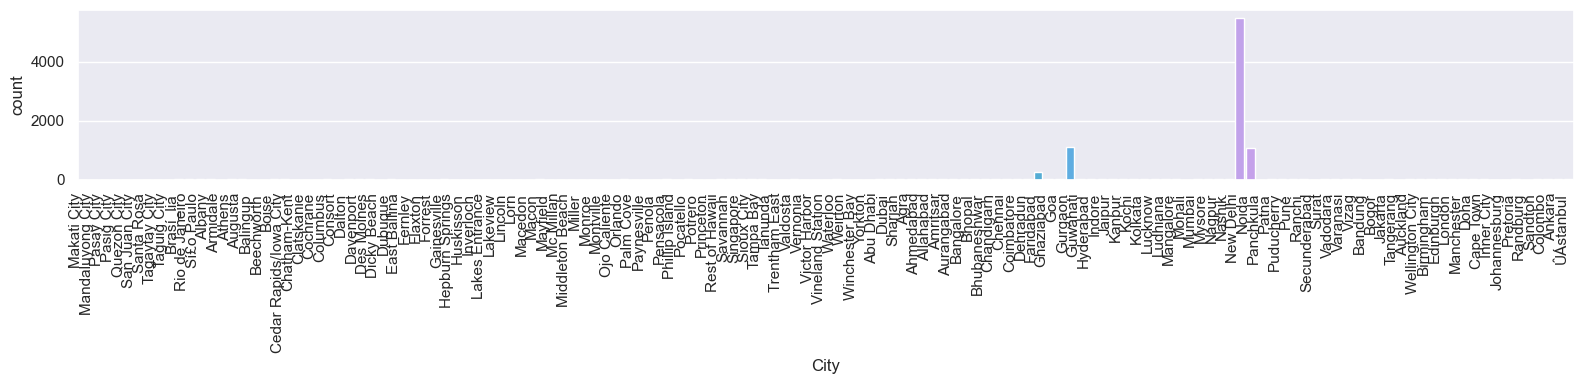

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64


In [28]:
#Lets check the column City

plt.figure(figsize=(16,4))
ax=sns.countplot(x= 'City',data=new_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right") 
plt.tight_layout()  # To ensure labels are fully visible
plt.show()
print(new_df['City'].value_counts())


The highest number of people are from India, city New Delhi as compare to others.

Text(0.5, 0, ' ')

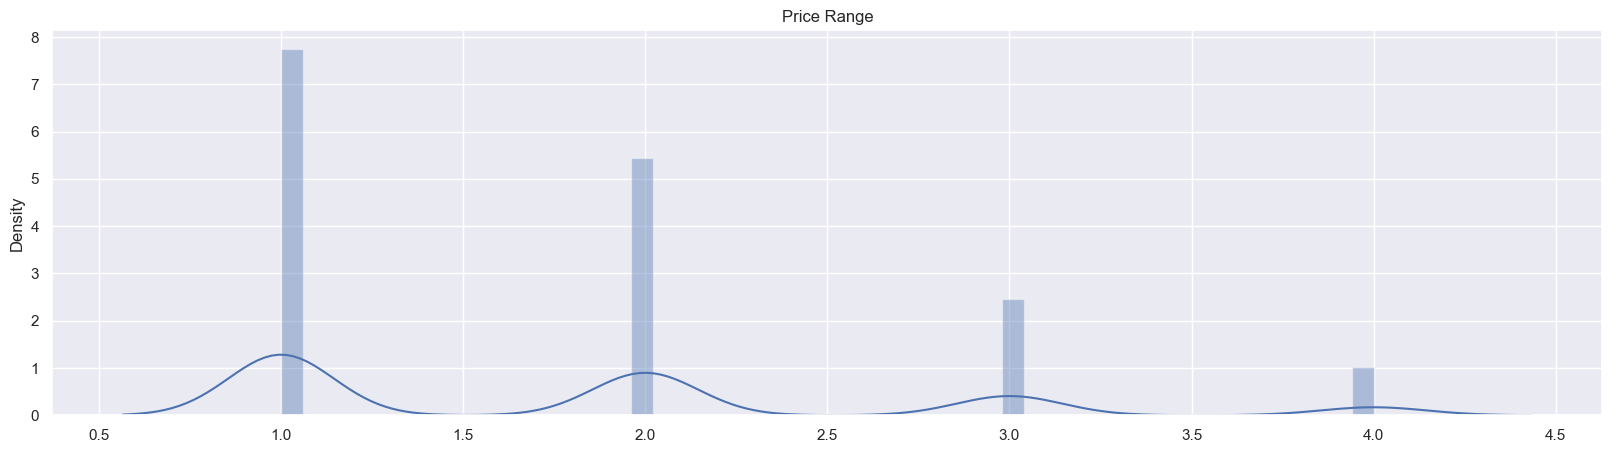

<Figure size 1200x600 with 0 Axes>

In [29]:
#Lets check features with Price range available 

sns.set(style="darkgrid")
plot_graph = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
fig,ax1=plot_graph

plt.figure(figsize=(12,6))
sns.distplot(new_df["Price range"],bins=50,ax=ax1)
ax1.set_title("Price Range")
ax1.set_xlabel(" ")

Most of the price ranges are available in 1.0 then 2 

<AxesSubplot:xlabel='Currency', ylabel='count'>

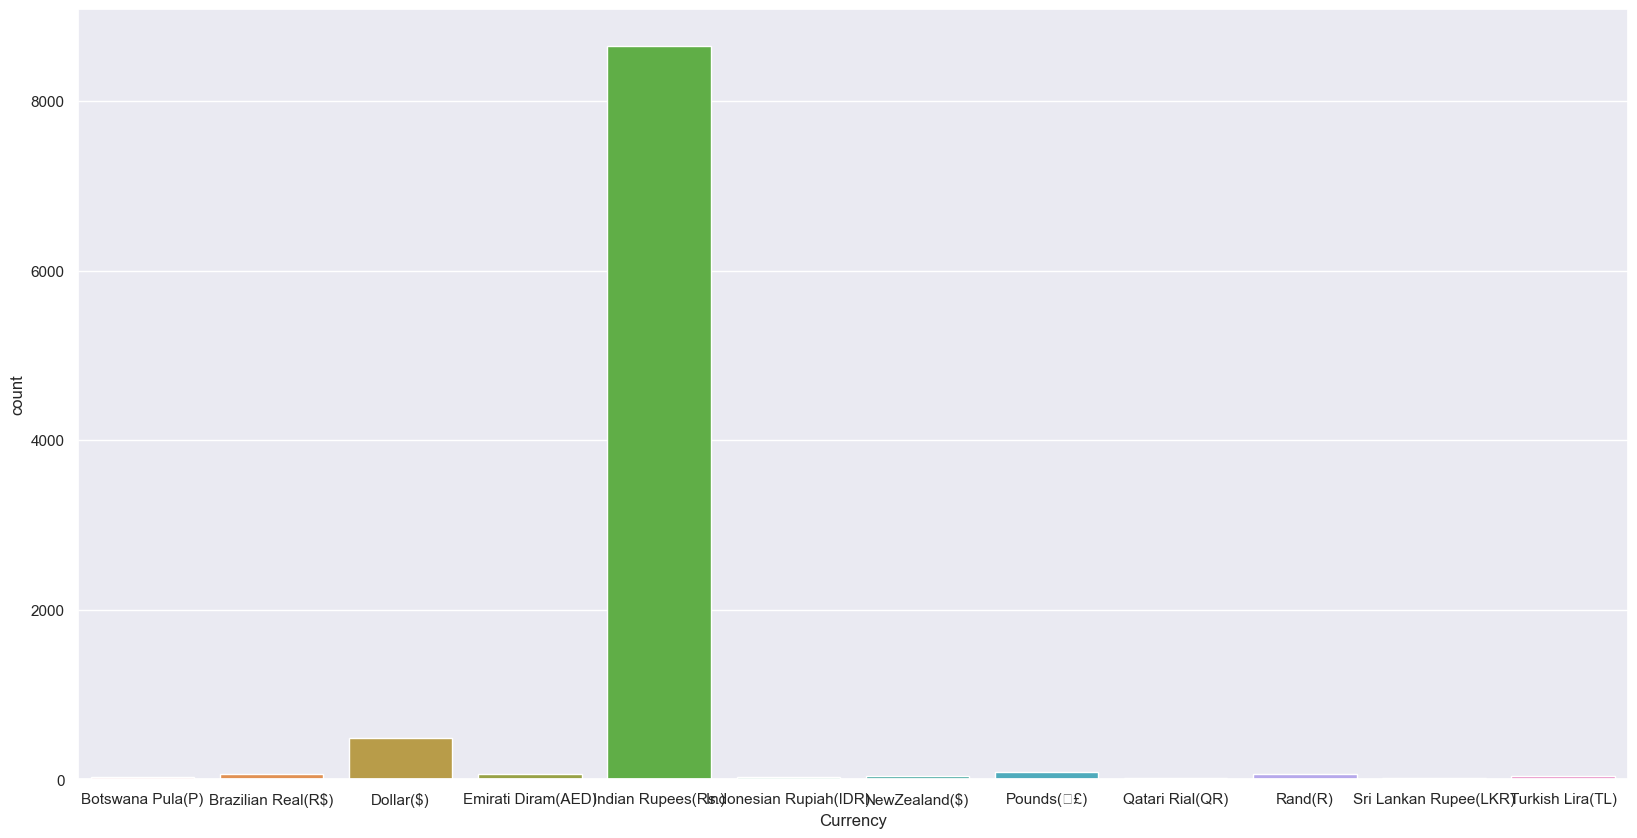

In [30]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1,1,figsize=(20,10),sharey=True)
sns.countplot("Currency", data=new_df, ax=axes)
          

Most of the currency is being used in Rupees and US dollars


## Bivariate Graph 

Analyzing multiple features together to see the relation

Text(0.5, 1.0, 'Top 10 Local Restaurants in New Delhi')

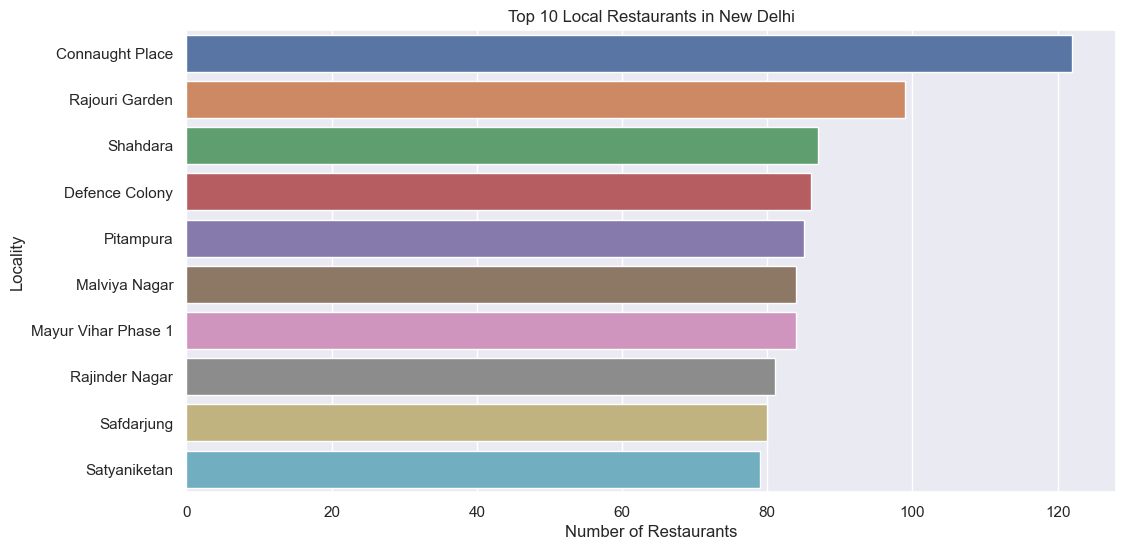

In [31]:
#Now after checking the graphs and feature relationship, let take the best Restarant in india

delhi_df = new_df[new_df['City'] == 'New Delhi']

top_local = delhi_df['Locality'].value_counts().head(10)

#create a graph 

plt.figure(figsize=(12, 6))

sns.barplot(x=top_local.values, y=top_local.index, orient='h')

plt.xlabel('Number of Restaurants')
plt.ylabel('Locality')

plt.title('Top 10 Local Restaurants in New Delhi')

In [32]:
top_food = new_df['Cuisines'].value_counts().head(10)
top_food

North Indian                      945
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

Text(0.5, 1.0, 'Comparision between Cuisines and Average cost')

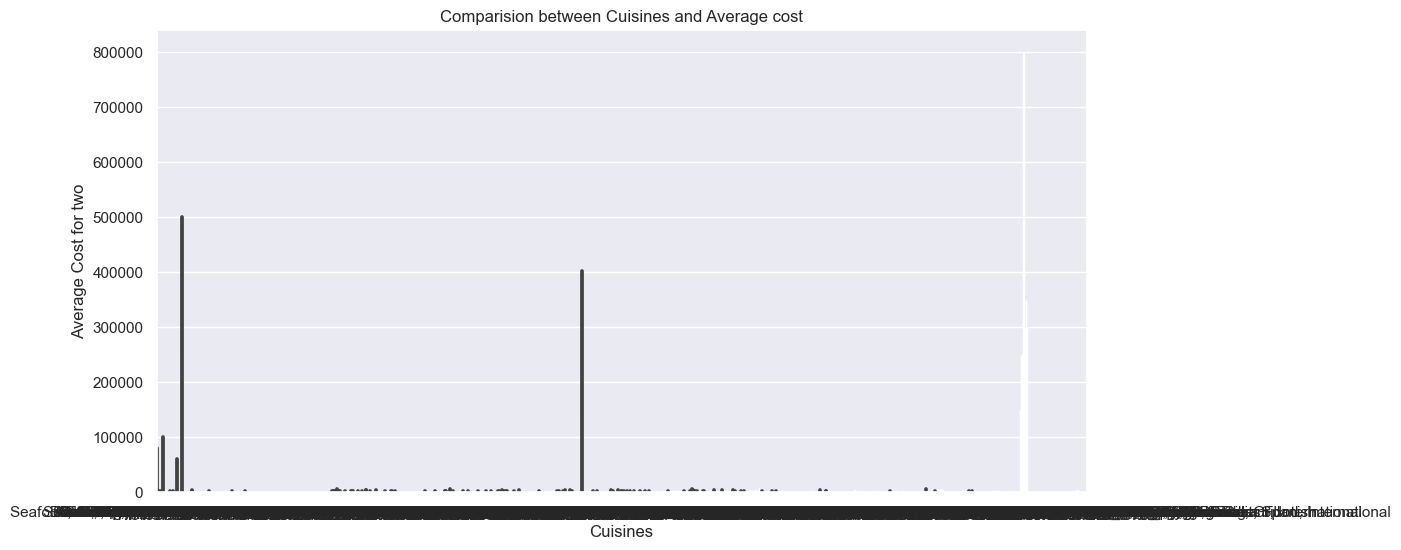

In [33]:
#when we are comparing two data plot:
plt.figure(figsize=(12, 6))

sns.barplot(x="Cuisines", y = "Average Cost for two",data = new_df)

plt.xlabel('Cuisines')
plt.ylabel('Average Cost for two')

plt.title("Comparision between Cuisines and Average cost")


This graph shows that higher the rating 4.9, higher the price if we check in scatter plot it should show linear graph positive

<AxesSubplot:title={'center':'Comparision between Average Cost for two and Price range'}, xlabel='Restaurant Name', ylabel='Average Cost for two'>

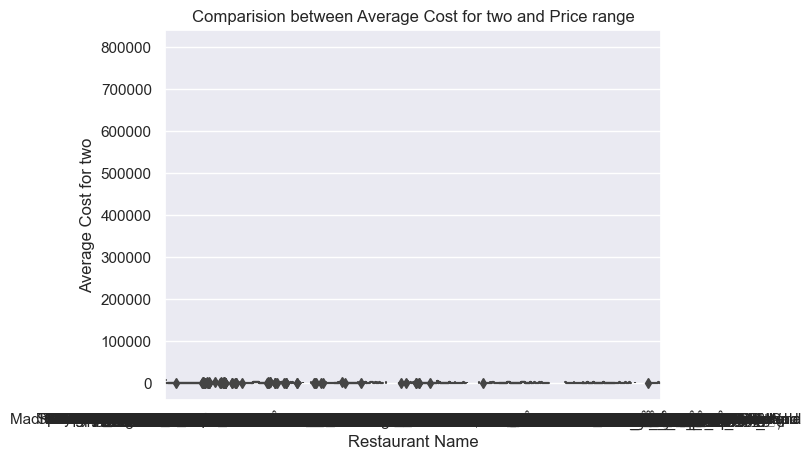

In [34]:
#when we are comparing two data plot:

plt.title("Comparision between Average Cost for two and Price range")
sns.boxplot(x="Restaurant Name", y = "Average Cost for two",data = new_df)


In [35]:
new_df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

The graph shows the Average of two people eating in the retaurant with ratings and cuisines in the country 


The Restaurant Name 

<AxesSubplot:xlabel='Price range', ylabel='Density'>

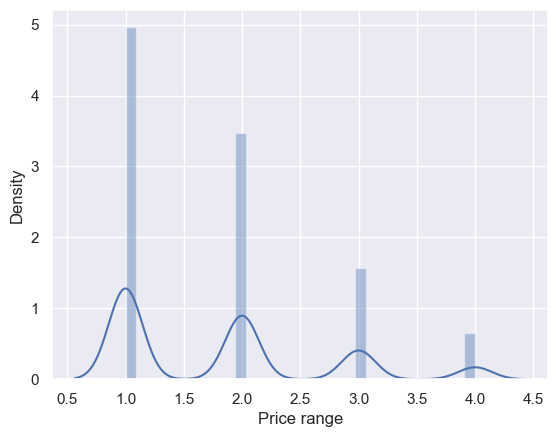

In [36]:
#Analyze the Target variable

sns.distplot(new_df['Price range'])

<AxesSubplot:xlabel='Average Cost for two', ylabel='Density'>

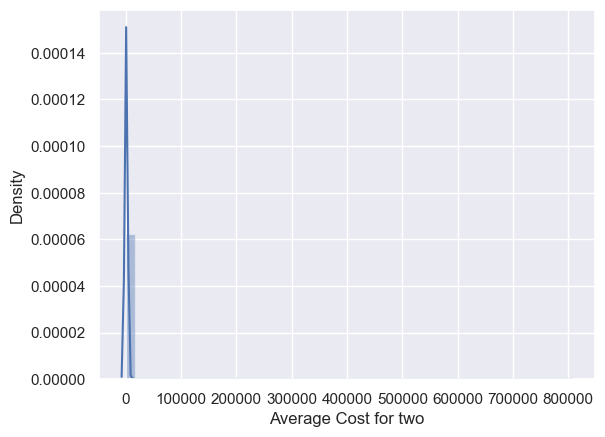

In [37]:
#Analyze the Target variable

sns.distplot(new_df['Average Cost for two'])

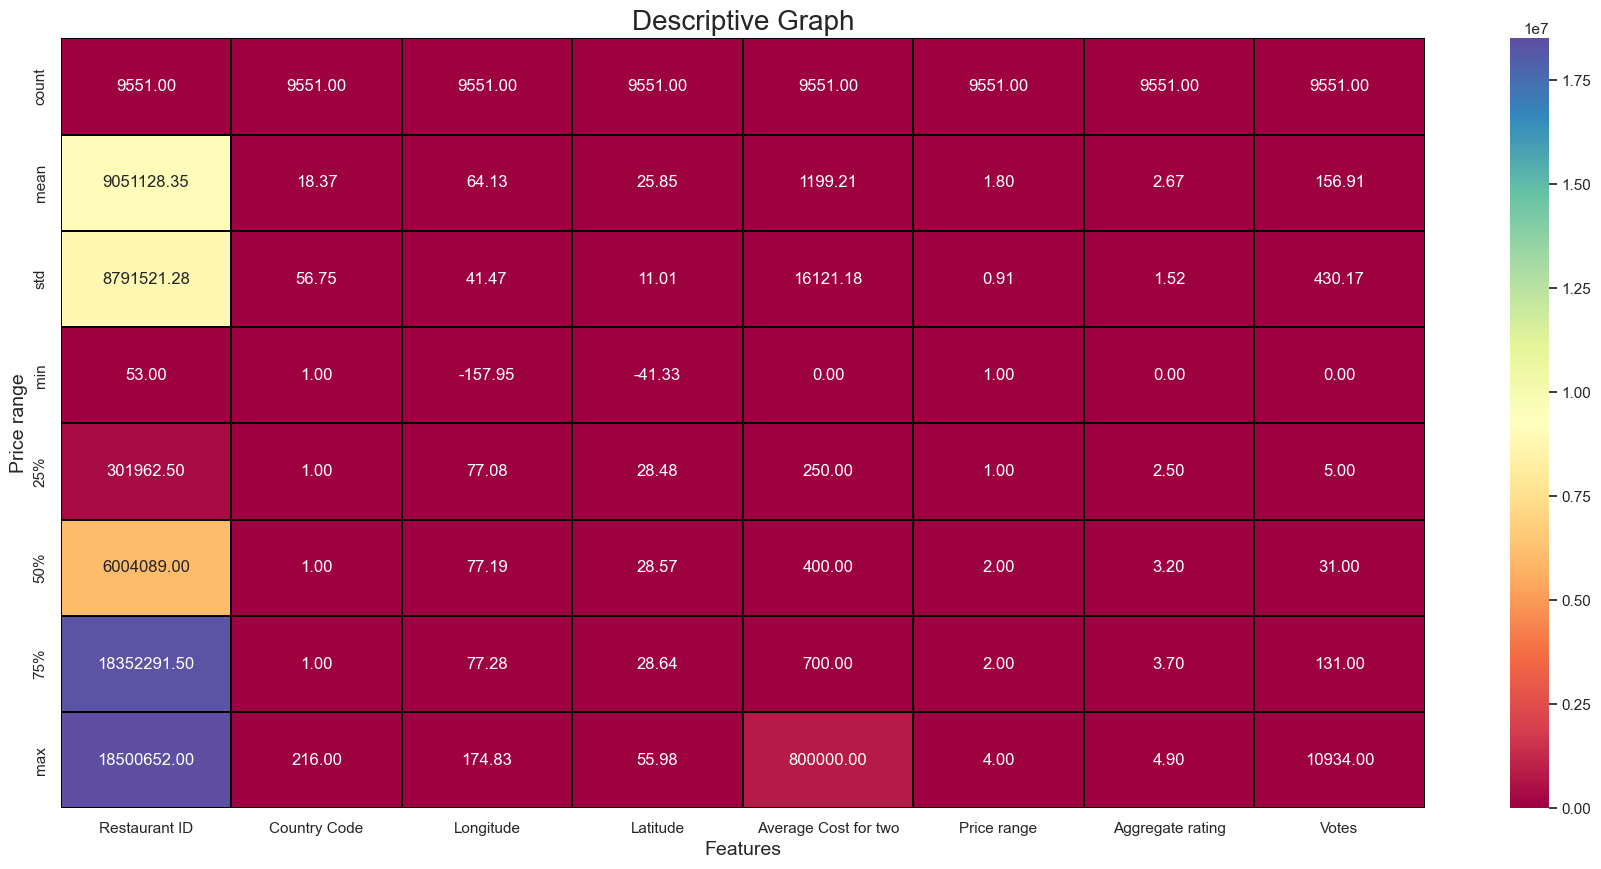

In [38]:
#Descriptive Graph of features and target variable of the team 

plt.figure(figsize=(22,10))
sns.heatmap(new_df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Price range',fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()


After observing the Price range descriptive graph, shows values of the relation 

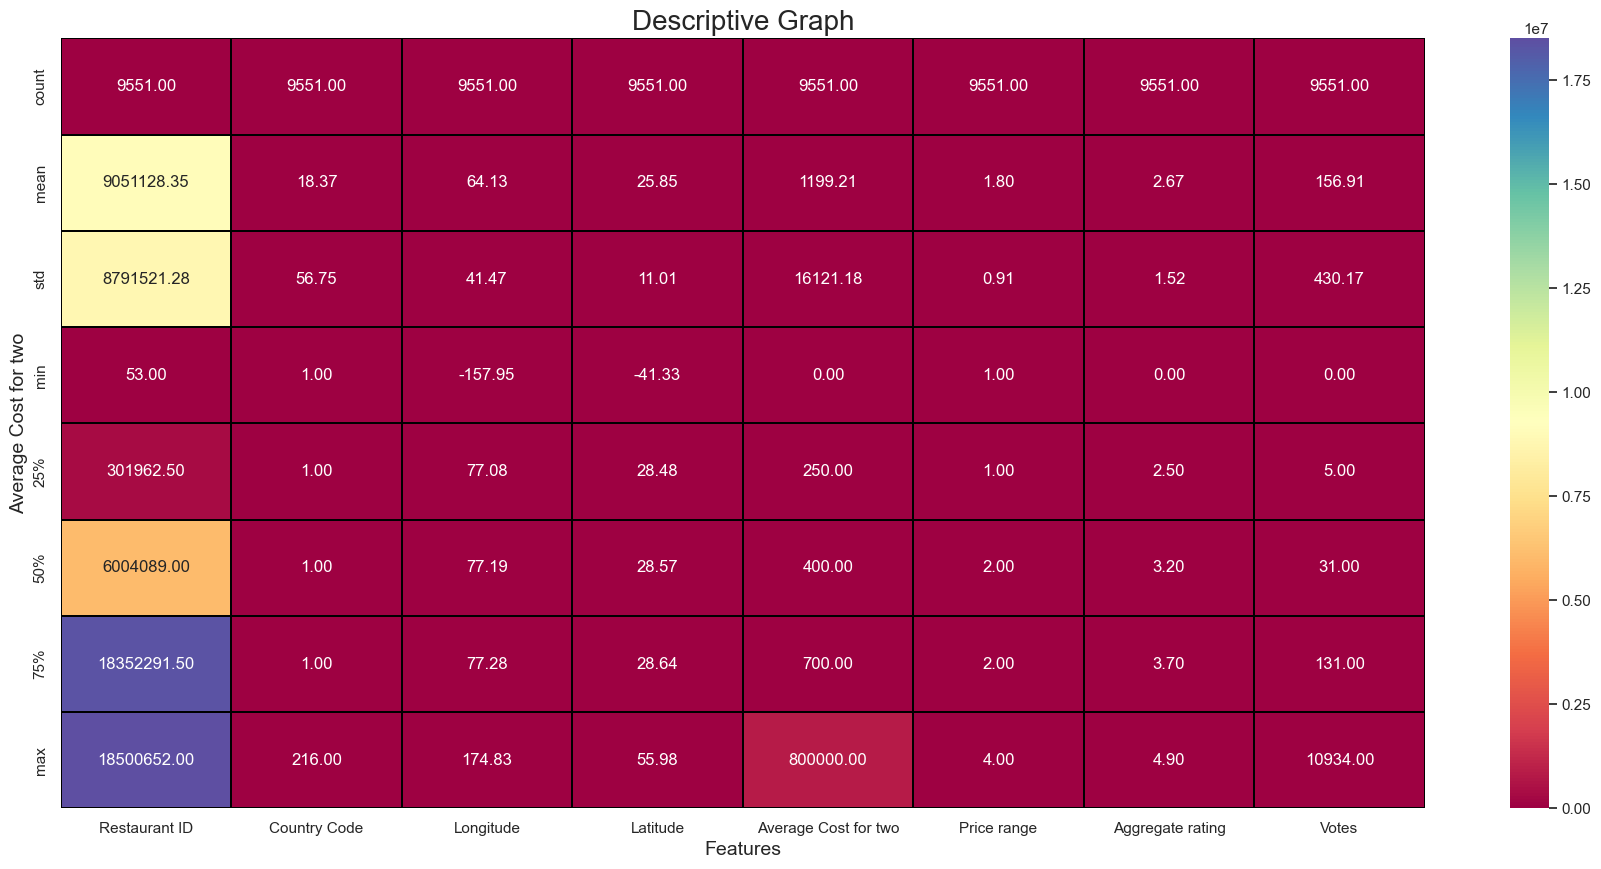

In [39]:
#Descriptive Graph of features and target variable of the team 

plt.figure(figsize=(22,10))
sns.heatmap(new_df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Average Cost for two',fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()


<AxesSubplot:>

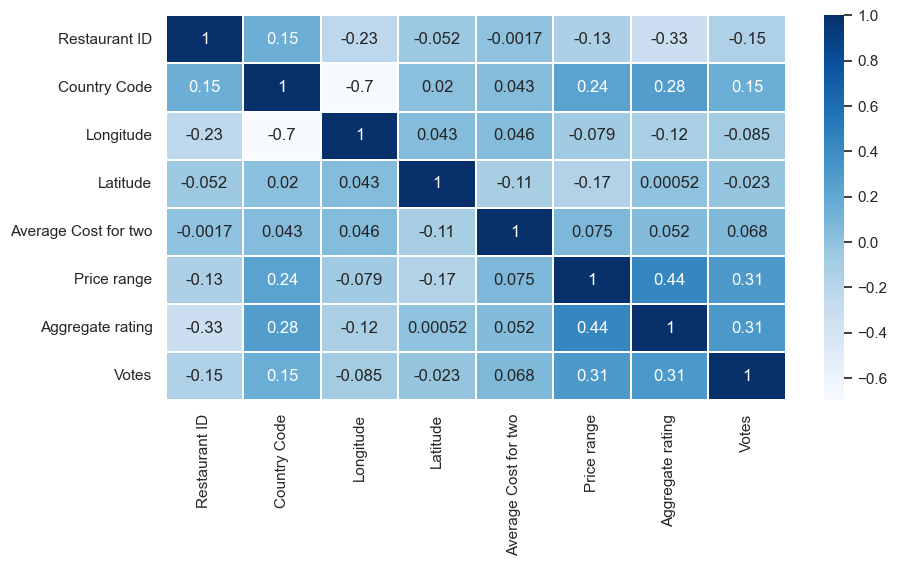

In [40]:
#Correlation map to display the most correlated variables:

cor = new_df.corr(method ="pearson")
f, ax=plt.subplots(figsize = (10,5))
sns.heatmap(new_df.corr(),cmap="Blues",annot=True, ax= ax,linewidth=.25)


Price range column has higher correlation with Aggregate rating, votes and Country code

In [41]:
new_df.corr()

Restaurant ID  Country Code  Longitude  Latitude  \
Restaurant ID              1.000000      0.148471  -0.226081 -0.052081   
Country Code               0.148471      1.000000  -0.698299  0.019792   
Longitude                 -0.226081     -0.698299   1.000000  0.043207   
Latitude                  -0.052081      0.019792   0.043207  1.000000   
Average Cost for two      -0.001693      0.043225   0.045891 -0.111088   
Price range               -0.134540      0.243327  -0.078939 -0.166688   
Aggregate rating          -0.326212      0.282189  -0.116818  0.000516   
Votes                     -0.147023      0.154530  -0.085101 -0.022962   

                      Average Cost for two  Price range  Aggregate rating  \
Restaurant ID                    -0.001693    -0.134540         -0.326212   
Country Code                      0.043225     0.243327          0.282189   
Longitude                         0.045891    -0.078939         -0.116818   
Latitude                         -0.111088    -0.166688          0.000516   
Average Cost for two              1.000000     0.075083          0.051792   
Price range                       0.075083     1.000000          0.437944   
Aggregate rating                  0.051792     0.437944          1.000000   
Votes                             0.067783     0.309444          0.313691   

                         Votes  
Restaurant ID        -0.147023  
Country Code          0.154530  
Longitude            -0.085101  
Latitude             -0.022962  
Average Cost for two  0.067783  
Price range           0.309444  
Aggregate rating      0.313691  
Votes                 1.000000

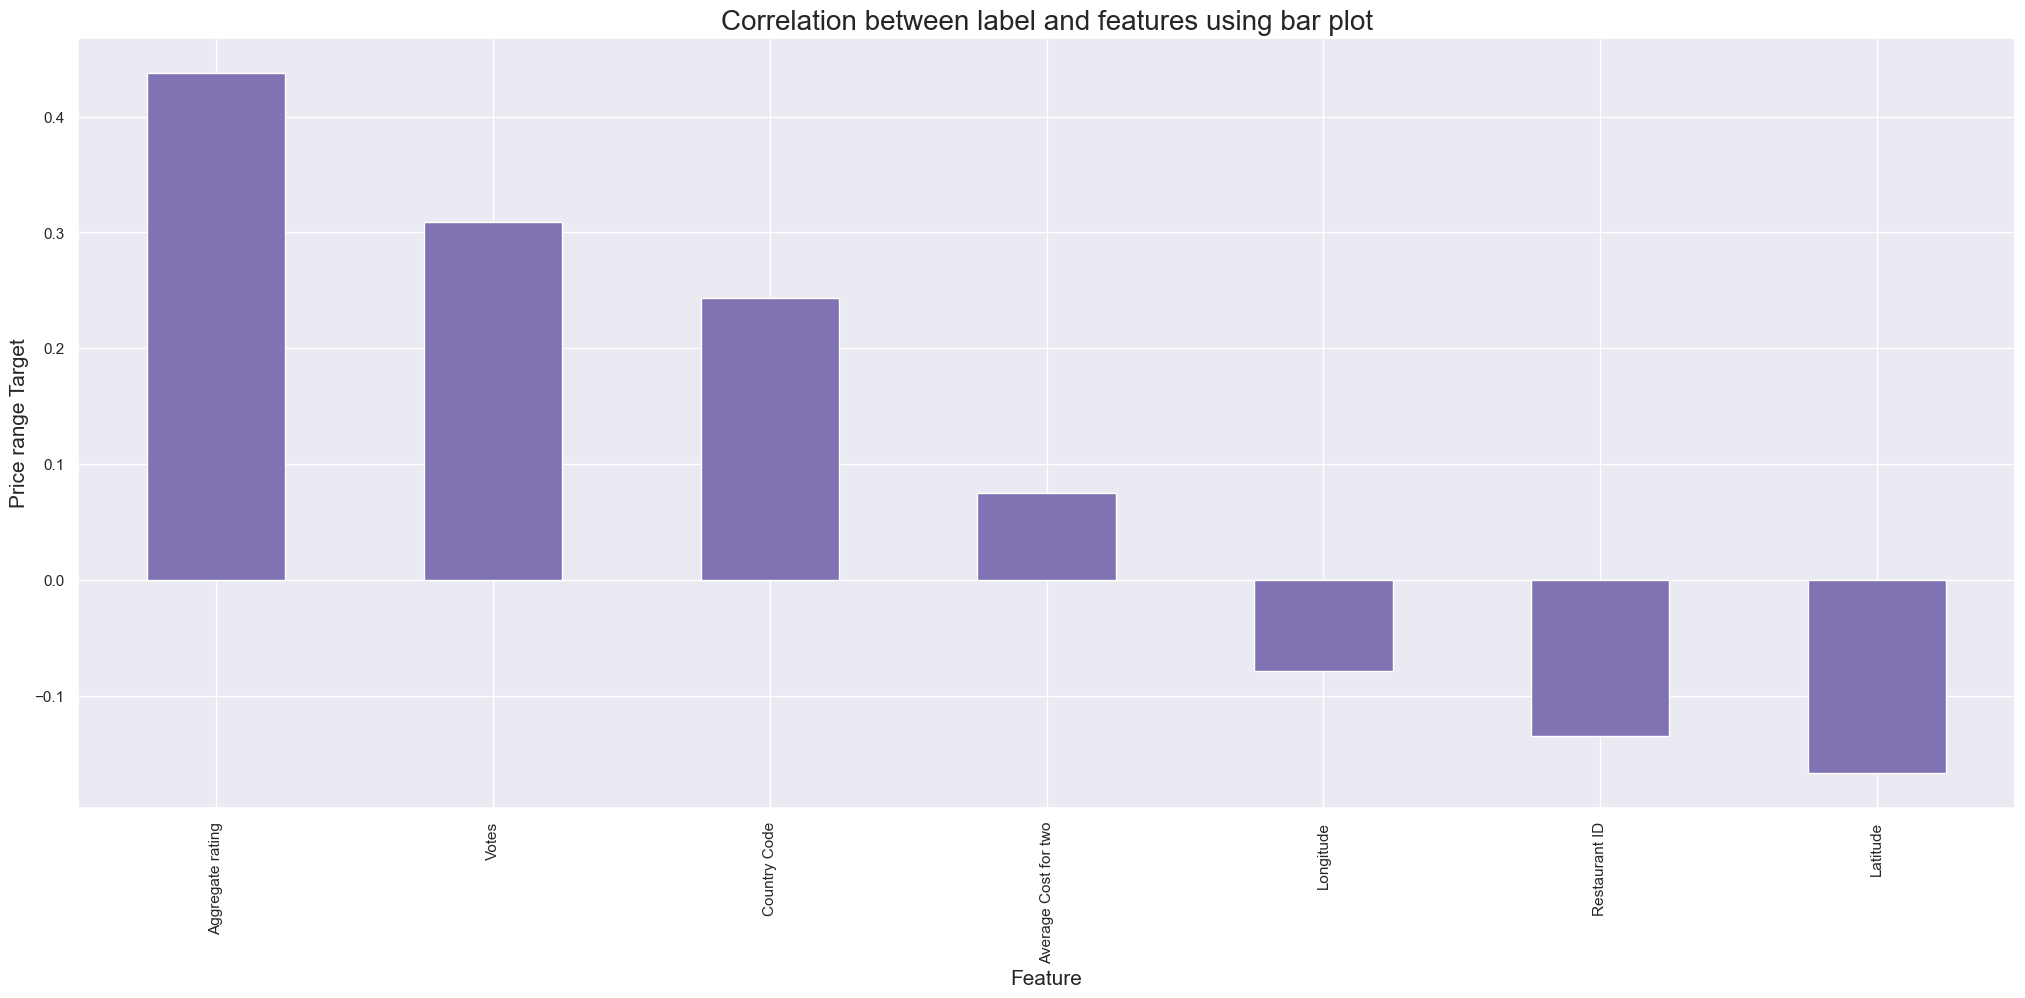

In [42]:
plt.figure(figsize = (25,10))

new_df.corr()['Price range'].sort_values(ascending = False).drop(['Price range']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Price range Target',fontsize = 15)
plt.title("Correlation between label and features using bar plot",fontsize=20)                                                        
plt.show()


The correlation graph shows that Price range is correlated with Aggregate rating, votes, Country code 

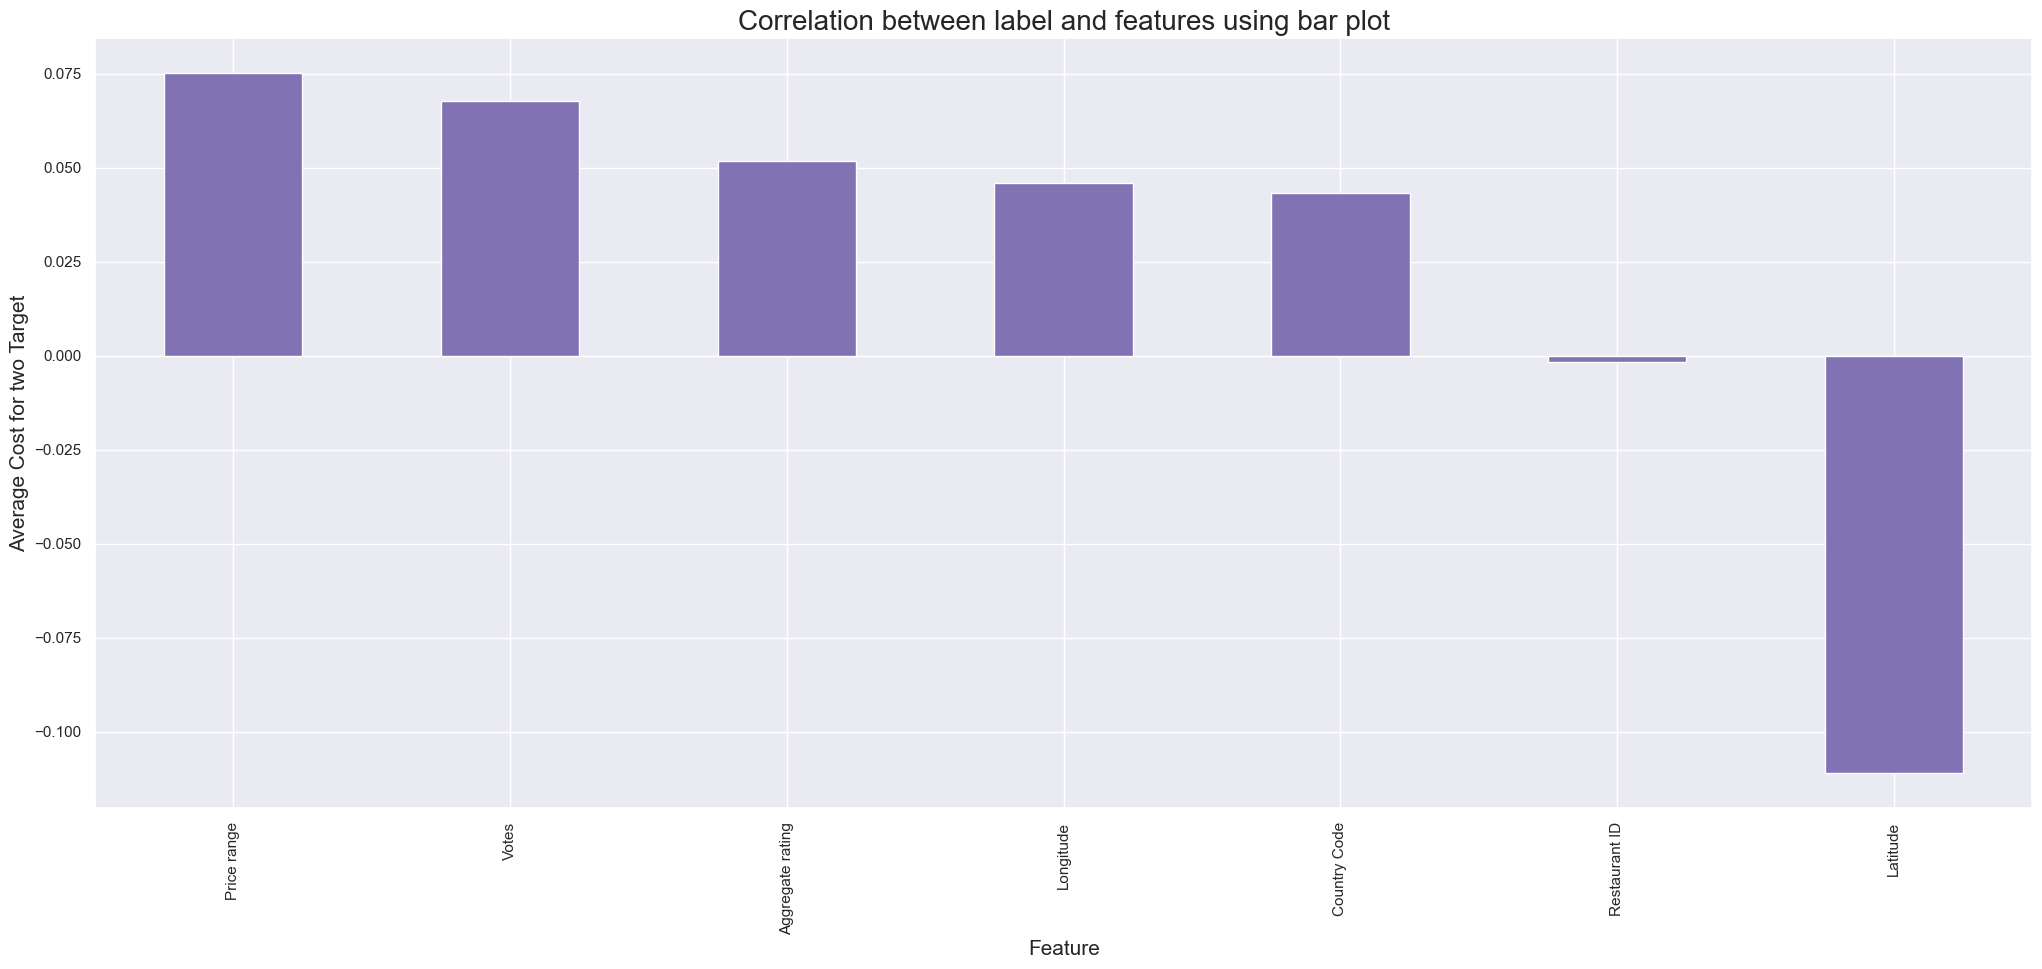

In [43]:
plt.figure(figsize = (25,10))

new_df.corr()['Average Cost for two'].sort_values(ascending = False).drop(['Average Cost for two']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Average Cost for two Target',fontsize = 15)
plt.title("Correlation between label and features using bar plot",fontsize=20)                                                        
plt.show()


'Average cost of two' has high correlation with Price range, ratings, votes and negative relation with Latitude. 

In [44]:
#changing categorical columns into number

categorical_col = ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency','Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 
                      'Rating color', 'Rating text', 'Country']
# Initialize LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_col:

    new_df[col] = label_encoder.fit_transform(new_df[col])

new_df

Restaurant ID  Restaurant Name  Country Code  City  Address  Locality  \
0           6317637             3749           162    73     8685       171   
1           6304287             3173           162    73     6055       593   
2           6300002             2897           162    75     4684       308   
3           6318506             4707           162    75     8690       862   
4           6314302             5523           162    75     8689       862   
...             ...              ...           ...   ...      ...       ...   
9546        5915730             4443           208   140     5926       517   
9547        5908749             1311           208   140     5962       552   
9548        5915807             3069           208   140     5966       554   
9549        5916112              513           208   140     5967       554   
9550        5927402             7240           208   140     4258       670   

      Locality Verbose   Longitude   Latitude  Cuisines  ...  \
0                  172  121.027535  14.565443       920  ...   
1                  601  121.014101  14.553708      1111  ...   
2                  314  121.056831  14.581404      1671  ...   
3                  875  121.056475  14.585318      1126  ...   
4                  875  121.057508  14.584450      1122  ...   
...                ...         ...        ...       ...  ...   
9546               523   28.977392  41.022793      1813  ...   
9547               558   29.041297  41.009847      1824  ...   
9548               561   29.034640  41.055817      1110  ...   
9549               561   29.036019  41.057979      1657  ...   
9550               681   29.026016  40.984776       331  ...   

      Has Table booking  Has Online delivery  Is delivering now  \
0                     1                    0                  0   
1                     1                    0                  0   
2                     1                    0                  0   
3                     0                    0                  0   
4                     1                    0                  0   
...                 ...                  ...                ...   
9546                  0                    0                  0   
9547                  0                    0                  0   
9548                  0                    0                  0   
9549                  0                    0                  0   
9550                  0                    0                  0   

      Switch to order menu  Price range  Aggregate rating  Rating color  \
0                        0            3               4.8             0   
1                        0            3               4.5             0   
2                        0            4               4.4             1   
3                        0            4               4.9             0   
4                        0            4               4.8             0   
...                    ...          ...               ...           ...   
9546                     0            3               4.1             1   
9547                     0            3               4.2             1   
9548                     0            4               3.7             5   
9549                     0            4               4.0             1   
9550                     0            2               4.0             1   

      Rating text  Votes  Country  
0               1    314        6  
1               1    591        6  
2               5    270        6  
3               1    365        6  
4               1    229        6  
...           ...    ...      ...  
9546            5    788       11  
9547            5   1034       11  
9548            2    661       11  
9549            5    901       11  
9550            5    591       11  

[9551 rows x 22 columns]

In [45]:
df2=new_df.copy()


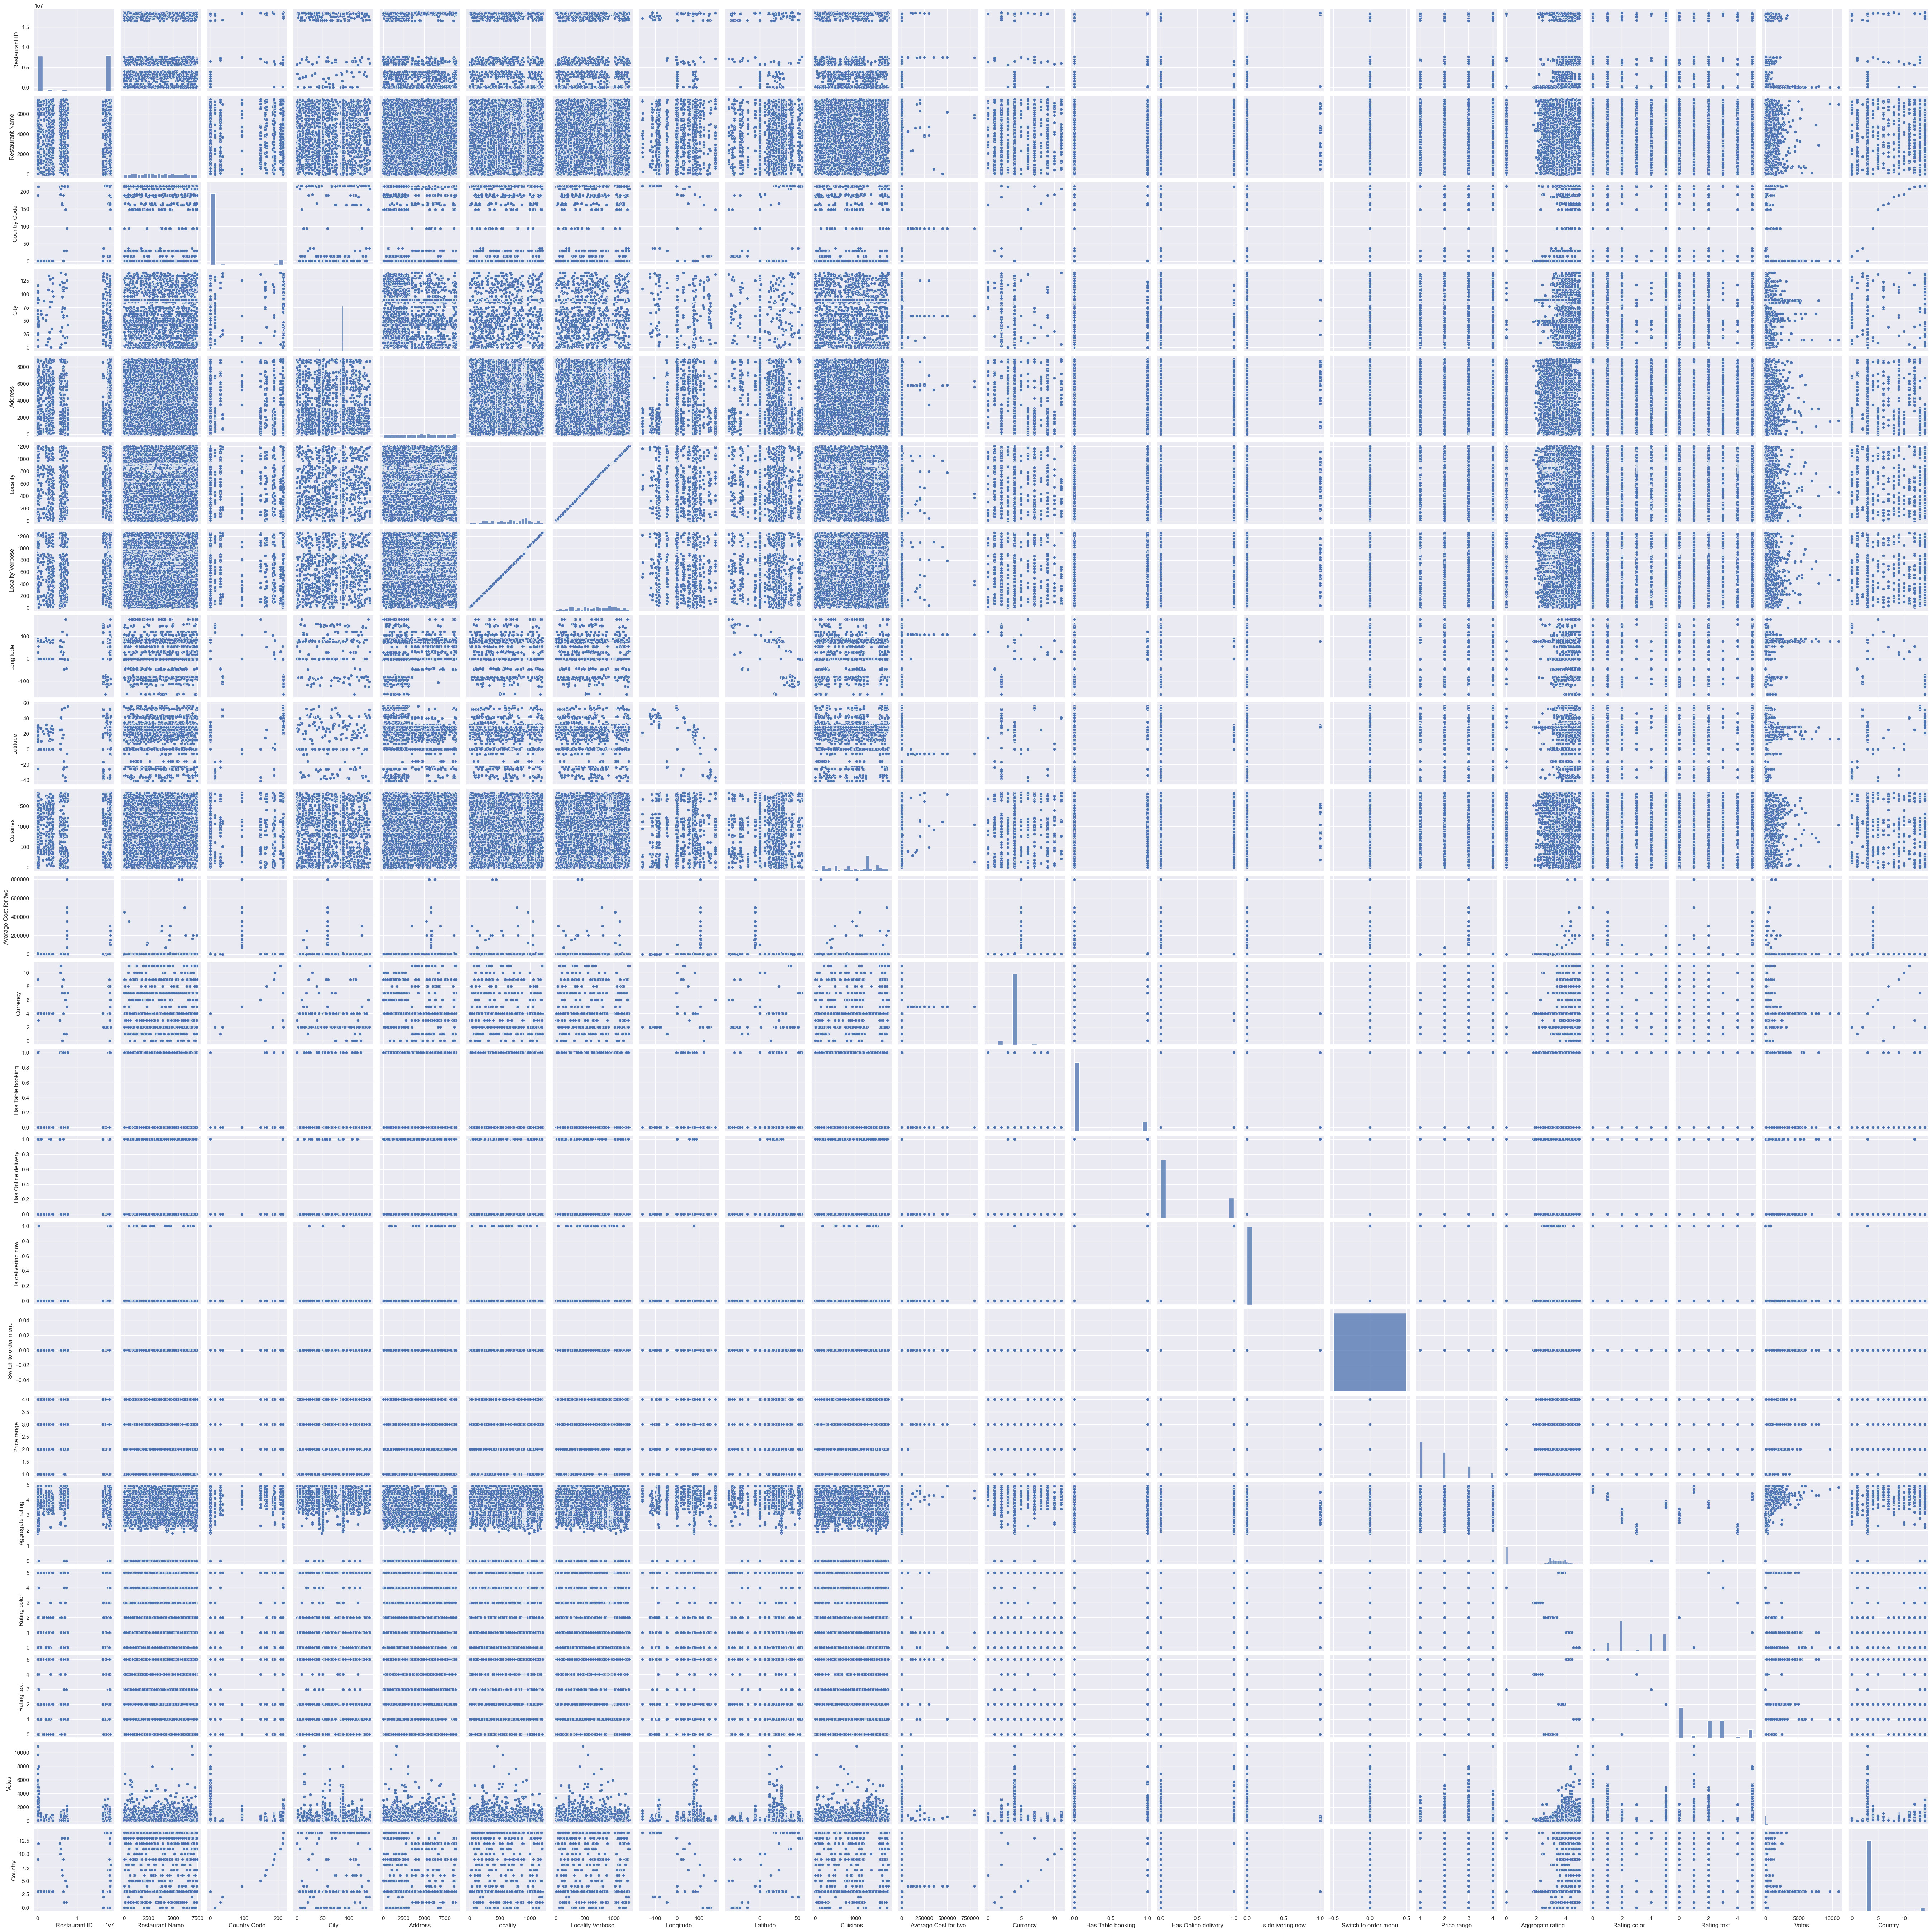

In [46]:
#Lets plot some more features against fraud report

sns.pairplot(new_df)

In [47]:
# we will Remove the columns that are irrelevant to build a model

df2.drop(columns=['Longitude','Latitude','Locality Verbose', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 
                      'Rating color', 'Rating text'],axis=1,inplace=True)



In [48]:
df2

Restaurant ID  Restaurant Name  Country Code  City  Address  Locality  \
0           6317637             3749           162    73     8685       171   
1           6304287             3173           162    73     6055       593   
2           6300002             2897           162    75     4684       308   
3           6318506             4707           162    75     8690       862   
4           6314302             5523           162    75     8689       862   
...             ...              ...           ...   ...      ...       ...   
9546        5915730             4443           208   140     5926       517   
9547        5908749             1311           208   140     5962       552   
9548        5915807             3069           208   140     5966       554   
9549        5916112              513           208   140     5967       554   
9550        5927402             7240           208   140     4258       670   

      Cuisines  Average Cost for two  Currency  Price range  Aggregate rating  \
0          920                  1100         0            3               4.8   
1         1111                  1200         0            3               4.5   
2         1671                  4000         0            4               4.4   
3         1126                  1500         0            4               4.9   
4         1122                  1500         0            4               4.8   
...        ...                   ...       ...          ...               ...   
9546      1813                    80        11            3               4.1   
9547      1824                   105        11            3               4.2   
9548      1110                   170        11            4               3.7   
9549      1657                   120        11            4               4.0   
9550       331                    55        11            2               4.0   

      Votes  Country  
0       314        6  
1       591        6  
2       270        6  
3       365        6  
4       229        6  
...     ...      ...  
9546    788       11  
9547   1034       11  
9548    661       11  
9549    901       11  
9550    591       11  

[9551 rows x 13 columns]

In [49]:
numerical_cols= ['Restaurant ID','Restaurant Name', 'City','Address','Cuisines','Locality',
                    'Country Code', 'Average Cost for two', 'Price range','Currency',
                    'Aggregate rating', 'Votes','Country']


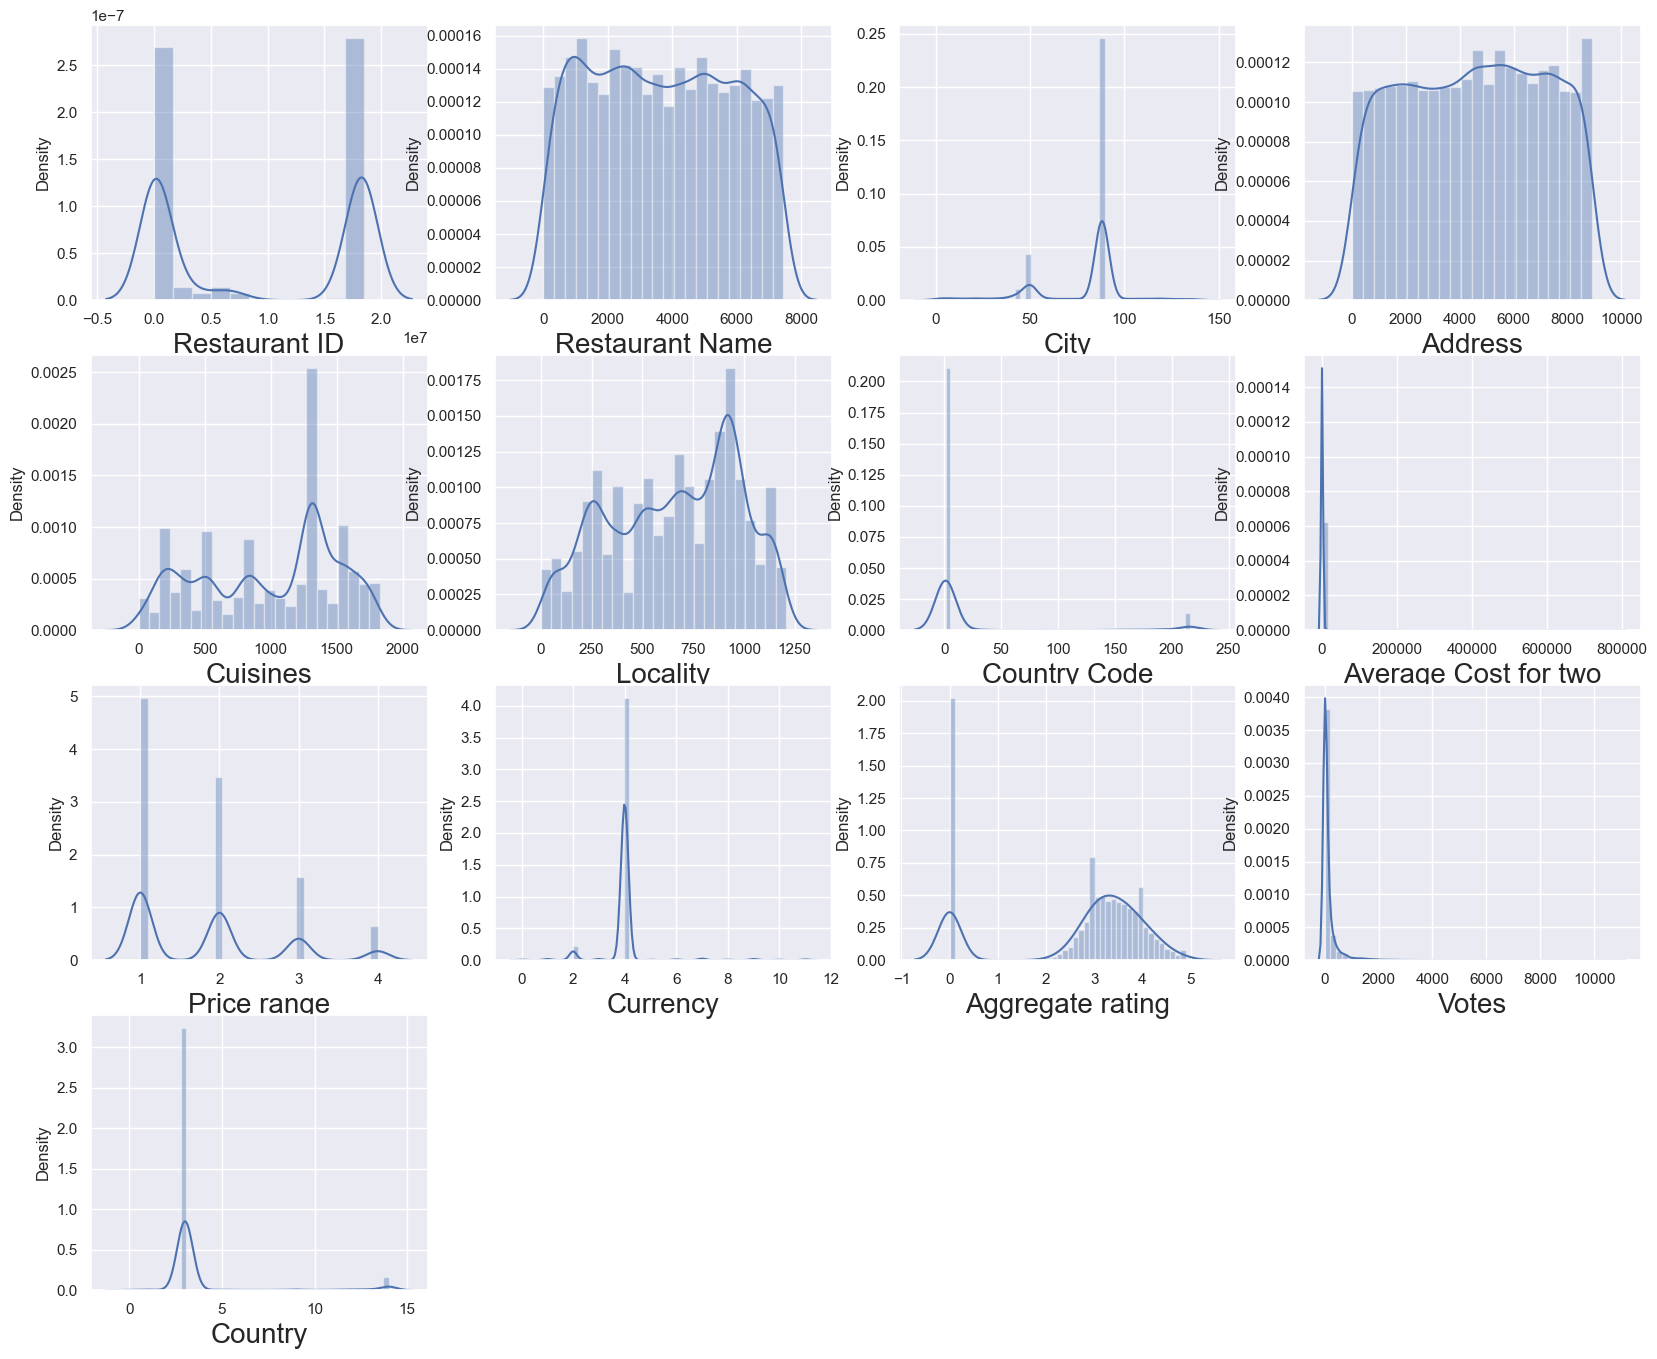

In [50]:
#Checking all the graphs for outliers


plt.figure(figsize=(20,25),facecolor="white")

plotnumber = 1

for column in numerical_cols:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df2[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1

plt.show()    



In [51]:
df2.skew()

Restaurant ID            0.061570
Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
Country                  3.312721
dtype: float64

if skewness is (-0.5 to +0.5 ), here skewness Average Cost of two, City, and Votes, Country have high number of skewnessn skew in the left tail of the distribution. 

Skewness is a statistical term and it is a way to estimate or measure the shape of a distribution. Skewness can be two types:

Skewness = 0: Then normally distributed.
Skewness > 0: Then more weight in the left tail of the distribution.
Skewness < 0: Then more weight in the right tail of the distribution.

# Checking for outliers:

In [52]:
#lets check the outliers by plotting boxplot of categorical/numerical column


for col in numerical_cols:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df2[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()


<Figure size 640x480 with 0 Axes>

Z- score method

In [53]:
# Removing the outliers using zscore and IQR techniques before building the models and selected best one. 

from scipy.stats import zscore
out_features=df2[['Restaurant ID','Restaurant Name','Country Code','City','Address','Locality',
                  'Cuisines','Average Cost for two','Currency','Price range','Aggregate rating',
                   'Votes','Country']]
z=np.abs(zscore(out_features))
z


Restaurant ID  Restaurant Name  Country Code      City   Address  \
0          0.310940         0.044706      2.531111  0.228533  1.614667   
1          0.312458         0.224101      2.531111  0.228533  0.589558   
2          0.312946         0.352904      2.531111  0.142317  0.055177   
3          0.310841         0.491783      2.531111  0.142317  1.616615   
4          0.311319         0.872592      2.531111  0.142317  1.616226   
...             ...              ...           ...       ...       ...   
9546       0.356658         0.368580      3.341718  2.659685  0.539277   
9547       0.357452         1.093055      3.341718  2.659685  0.553309   
9548       0.356649         0.272635      3.341718  2.659685  0.554868   
9549       0.356614         1.465464      3.341718  2.659685  0.555258   
9550       0.355330         1.673878      3.341718  2.659685  0.110867   

      Locality  Cuisines  Average Cost for two  Currency  Price range  \
0     1.542278  0.135100              0.006154  4.351046     1.319803   
1     0.206201  0.236387              0.000049  4.351046     1.319803   
2     1.108528  1.325565              0.173743  4.351046     2.424090   
3     0.645470  0.265562              0.018659  4.351046     2.424090   
4     0.645470  0.257782              0.018659  4.351046     2.424090   
...        ...       ...                   ...       ...          ...   
9546  0.446821  1.601750              0.069428  7.681415     1.319803   
9547  0.336009  1.623144              0.067878  7.681415     1.319803   
9548  0.329677  0.234442              0.063845  7.681415     2.424090   
9549  0.329677  1.298336              0.066947  7.681415     2.424090   
9550  0.037586  1.280682              0.070979  7.681415     0.215516   

      Aggregate rating     Votes   Country  
0             1.407131  0.365202  0.853457  
1             1.209281  1.009168  0.853457  
2             1.143331  0.262911  0.853457  
3             1.473081  0.483766  0.853457  
4             1.407131  0.167595  0.853457  
...                ...       ...       ...  
9546          0.945480  1.467151  2.738952  
9547          1.011430  2.039049  2.738952  
9548          0.681680  1.171903  2.738952  
9549          0.879530  1.729853  2.738952  
9550          0.879530  1.009168  2.738952  

[9551 rows x 13 columns]

In [54]:
#threshold =3

np.where(z>3)

(array([   0,    1,    2, ..., 9549, 9550, 9550], dtype=int64),
 array([8, 8, 8, ..., 8, 2, 8], dtype=int64))

In [55]:
df3=df2[(z<3).all(axis=1)]
df3.shape


(8508, 13)

In [56]:
#shape of old and new dataframe

print("old data frame",df2.shape[0])
print("new data frame",df3.shape[0])

old data frame 9551
new data frame 8508


In [57]:
print("Data loss percentage",((df2.shape[0]-df3.shape[0])/df2.shape[0])*100)

Data loss percentage 10.920322479321538


In [58]:
# we see many skewness in the data distributed in the graphs. 
df3.skew()

Restaurant ID            0.101494
Restaurant Name          0.047082
Country Code            11.899513
City                    -1.315604
Address                 -0.115771
Locality                -0.314710
Cuisines                -0.340132
Average Cost for two     3.708670
Currency                -0.771475
Price range              1.041638
Aggregate rating        -0.870112
Votes                    3.691596
Country                  7.777867
dtype: float64

Here the skewness is still present in Country, Country Code, Average Cost for two so we will remove it using johnson method.

In [59]:
#removing skewness using yeo- johnson method

Skew_data = ['Country','Average Cost for two']

from sklearn.preprocessing import PowerTransformer

sk = PowerTransformer(method='yeo-johnson')
df3[Skew_data] = sk.fit_transform(df3[Skew_data].values)
df3[Skew_data].head()


Country  Average Cost for two
143 -11.961292             -3.562190
144 -11.961292             -3.562190
185  -3.428596             -3.339978
208  -3.428596             -3.339978
269 -11.961292             -4.524387

In [60]:
df3.corr()

Restaurant ID  Restaurant Name  Country Code      City  \
Restaurant ID              1.000000         0.003902      0.035573 -0.008296   
Restaurant Name            0.003902         1.000000     -0.007233  0.009716   
Country Code               0.035573        -0.007233      1.000000  0.043536   
City                      -0.008296         0.009716      0.043536  1.000000   
Address                    0.143515         0.002409     -0.080826 -0.097520   
Locality                   0.090910         0.004802      0.007011 -0.026012   
Cuisines                  -0.057836         0.059913     -0.050650  0.028566   
Average Cost for two      -0.136550         0.057402     -0.192510 -0.082640   
Currency                  -0.054518         0.000599      0.154663 -0.052833   
Price range               -0.141761         0.061112      0.163552 -0.075241   
Aggregate rating          -0.380886         0.025539      0.086132 -0.072553   
Votes                     -0.240556         0.022995      0.032325 -0.088008   
Country                    0.003650        -0.004595      0.709881  0.072040   

                       Address  Locality  Cuisines  Average Cost for two  \
Restaurant ID         0.143515  0.090910 -0.057836             -0.136550   
Restaurant Name       0.002409  0.004802  0.059913              0.057402   
Country Code         -0.080826  0.007011 -0.050650             -0.192510   
City                 -0.097520 -0.026012  0.028566             -0.082640   
Address               1.000000  0.145127 -0.013327              0.029074   
Locality              0.145127  1.000000 -0.012447             -0.080726   
Cuisines             -0.013327 -0.012447  1.000000              0.009857   
Average Cost for two  0.029074 -0.080726  0.009857              1.000000   
Currency              0.019470  0.036759  0.012888              0.040542   
Price range          -0.026918 -0.092687  0.011777              0.798029   
Aggregate rating     -0.111782 -0.147505 -0.055840              0.367731   
Votes                -0.089345 -0.146125 -0.025202              0.375589   
Country              -0.023270  0.008102 -0.012281             -0.004483   

                      Currency  Price range  Aggregate rating     Votes  \
Restaurant ID        -0.054518    -0.141761         -0.380886 -0.240556   
Restaurant Name       0.000599     0.061112          0.025539  0.022995   
Country Code          0.154663     0.163552          0.086132  0.032325   
City                 -0.052833    -0.075241         -0.072553 -0.088008   
Address               0.019470    -0.026918         -0.111782 -0.089345   
Locality              0.036759    -0.092687         -0.147505 -0.146125   
Cuisines              0.012888     0.011777         -0.055840 -0.025202   
Average Cost for two  0.040542     0.798029          0.367731  0.375589   
Currency              1.000000     0.008158          0.013770  0.042764   
Price range           0.008158     1.000000          0.399905  0.415548   
Aggregate rating      0.013770     0.399905          1.000000  0.414105   
Votes                 0.042764     0.415548          0.414105  1.000000   
Country               0.294379     0.104080          0.029814  0.008404   

                       Country  
Restaurant ID         0.003650  
Restaurant Name      -0.004595  
Country Code          0.709881  
City                  0.072040  
Address              -0.023270  
Locality              0.008102  
Cuisines             -0.012281  
Average Cost for two -0.004483  
Currency              0.294379  
Price range           0.104080  
Aggregate rating      0.029814  
Votes                 0.008404  
Country               1.000000

In [61]:
df3.describe()

Restaurant ID  Restaurant Name  Country Code         City      Address  \
count   8.508000e+03      8508.000000   8508.000000  8508.000000  8508.000000   
mean    8.861194e+06      3637.291373      2.173366    80.473084  4697.465797   
std     8.963464e+06      2140.008646     13.417447    18.254721  2532.866631   
min     5.300000e+01         0.000000      1.000000     9.000000     0.000000   
25%     3.011028e+05      1759.000000      1.000000    88.000000  2595.750000   
50%     2.750138e+06      3573.000000      1.000000    88.000000  4809.500000   
75%     1.836308e+07      5476.250000      1.000000    88.000000  6880.250000   
max     1.850065e+07      7444.000000    184.000000   139.000000  8914.000000   

          Locality     Cuisines  Average Cost for two     Currency  \
count  8508.000000  8508.000000          8.508000e+03  8508.000000   
mean    675.165726  1007.732370          8.288830e-17     3.998354   
std     304.847809   504.104176          1.000059e+00     0.202249   
min       0.000000     0.000000         -6.381840e+00     2.000000   
25%     434.750000   518.000000         -5.293428e-01     4.000000   
50%     706.000000  1235.000000         -1.523153e-02     4.000000   
75%     924.000000  1373.000000          5.630202e-01     4.000000   
max    1203.000000  1821.000000          4.111510e+00     6.000000   

       Price range  Aggregate rating        Votes       Country  
count  8508.000000       8508.000000  8508.000000  8.508000e+03  
mean      1.707452          2.496544    92.749765 -2.565779e-15  
std       0.848099          1.509033   181.342235  1.000059e+00  
min       1.000000          0.000000     0.000000 -1.196129e+01  
25%       1.000000          0.000000     3.000000 -2.648945e-02  
50%       1.000000          3.100000    23.000000 -2.648945e-02  
75%       2.000000          3.500000    93.000000 -2.648945e-02  
max       4.000000          4.900000  1439.000000  1.368641e+01

In [62]:
cor['Price range'].sort_values

<bound method Series.sort_values of Restaurant ID          -0.134540
Country Code            0.243327
Longitude              -0.078939
Latitude               -0.166688
Average Cost for two    0.075083
Price range             1.000000
Aggregate rating        0.437944
Votes                   0.309444
Name: Price range, dtype: float64>

In [63]:
cor['Average Cost for two'].sort_values

<bound method Series.sort_values of Restaurant ID          -0.001693
Country Code            0.043225
Longitude               0.045891
Latitude               -0.111088
Average Cost for two    1.000000
Price range             0.075083
Aggregate rating        0.051792
Votes                   0.067783
Name: Average Cost for two, dtype: float64>

# Seperating features and label

In [64]:
#Seperating the independent and target variables into x1 and y1 for Price range:

x1 = df3.drop(["Price range","Country Code"],axis=1)
y1 = df3['Price range'].astype(int)

print("Feature Dimension",x1.shape)
print("Label Dimension",y1.shape)

Feature Dimension (8508, 11)
Label Dimension (8508,)


In [72]:
#Seperating the independent and target variables into x2 and y2 for Average Cost for two:

x2 = df3.drop(["Average Cost for two","Country Code"],axis=1)
y2 = df3['Average Cost for two'].astype(int)

print("Feature Dimension",x2.shape)
print("Label Dimension",y2.shape)


Feature Dimension (8508, 11)
Label Dimension (8508,)


# Feature Scaling using Standard Scalarization


In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1),columns =x1.columns)
x1

Restaurant ID  Restaurant Name      City   Address  Locality  Cuisines  \
0          0.864412         1.253671 -3.751200 -0.799325 -1.909805  0.520295   
1          0.863971        -1.247868 -3.586849  0.790271 -1.850756  1.212653   
2          0.870025         1.547145 -3.039014 -1.583858 -1.621120  0.234623   
3          0.868272        -0.886633 -2.655529 -0.926856 -1.499740 -0.991386   
4          0.865196         1.388258 -2.381611 -1.626895 -1.289787 -0.769196   
...             ...              ...       ...       ...       ...       ...   
8503      -0.196438         0.236793  3.096746 -1.513183  1.223090 -1.342524   
8504      -0.196386         0.485872  3.096746 -1.518711  1.223090  0.371508   
8505      -0.196393         1.778466  3.096746 -1.096635  1.646276  0.208833   
8506      -0.196377        -1.055801  3.096746  0.378461  1.646276 -0.429961   
8507      -0.196409         1.355546  3.096746 -1.597283  1.646276  1.343586   

      Average Cost for two  Currency  Aggregate rating     Votes    Country  
0                -3.562190 -9.881230          0.466191 -0.395683 -11.961292  
1                -3.562190 -9.881230          1.393991  0.795505 -11.961292  
2                -3.339978 -9.881230          0.797548  0.459105  -3.428596  
3                -3.339978 -9.881230          0.333648 -0.478404  -3.428596  
4                -4.524387 -9.881230          0.731276 -0.351565 -11.961292  
...                    ...       ...               ...       ...        ...  
8503             -2.854399  9.897503          1.195177  0.354325   5.954089  
8504             -2.097873  9.897503          1.128905  0.293662   5.954089  
8505             -2.247219  9.897503          0.797548  0.210941   5.954089  
8506             -1.734911  9.897503          1.195177  0.266088   5.954089  
8507             -1.964740  9.897503          1.062634  0.751387   5.954089  

[8508 rows x 11 columns]

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x2 = pd.DataFrame(scaler.fit_transform(x2),columns =x2.columns)
x2

Restaurant ID  Restaurant Name      City   Address  Locality  Cuisines  \
0          0.864412         1.253671 -3.751200 -0.799325 -1.909805  0.520295   
1          0.863971        -1.247868 -3.586849  0.790271 -1.850756  1.212653   
2          0.870025         1.547145 -3.039014 -1.583858 -1.621120  0.234623   
3          0.868272        -0.886633 -2.655529 -0.926856 -1.499740 -0.991386   
4          0.865196         1.388258 -2.381611 -1.626895 -1.289787 -0.769196   
...             ...              ...       ...       ...       ...       ...   
8503      -0.196438         0.236793  3.096746 -1.513183  1.223090 -1.342524   
8504      -0.196386         0.485872  3.096746 -1.518711  1.223090  0.371508   
8505      -0.196393         1.778466  3.096746 -1.096635  1.646276  0.208833   
8506      -0.196377        -1.055801  3.096746  0.378461  1.646276 -0.429961   
8507      -0.196409         1.355546  3.096746 -1.597283  1.646276  1.343586   

      Currency  Price range  Aggregate rating     Votes    Country  
0    -9.881230     0.344966          0.466191 -0.395683 -11.961292  
1    -9.881230     0.344966          1.393991  0.795505 -11.961292  
2    -9.881230     0.344966          0.797548  0.459105  -3.428596  
3    -9.881230     0.344966          0.333648 -0.478404  -3.428596  
4    -9.881230    -0.834211          0.731276 -0.351565 -11.961292  
...        ...          ...               ...       ...        ...  
8503  9.897503     0.344966          1.195177  0.354325   5.954089  
8504  9.897503     2.703320          1.128905  0.293662   5.954089  
8505  9.897503     2.703320          0.797548  0.210941   5.954089  
8506  9.897503     2.703320          1.195177  0.266088   5.954089  
8507  9.897503     2.703320          1.062634  0.751387   5.954089  

[8508 rows x 11 columns]

# VIF to find multicolinearity


In [68]:
#Finding variance inflaction factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif["Features"]=x1.columns
vif


VIF values              Features
0     1.211091         Restaurant ID
1     1.007708       Restaurant Name
2     1.036801                  City
3     1.062305               Address
4     1.052060              Locality
5     1.017132              Cuisines
6     1.262071  Average Cost for two
7     1.111052              Currency
8     1.462697      Aggregate rating
9     1.331253                 Votes
10    1.108386               Country

In [69]:
#Finding variance inflaction factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif["Features"]=x2.columns
vif


VIF values          Features
0     1.212047     Restaurant ID
1     1.008191   Restaurant Name
2     1.037442              City
3     1.055630           Address
4     1.051969          Locality
5     1.017775          Cuisines
6     1.112280          Currency
7     1.338083       Price range
8     1.478695  Aggregate rating
9     1.363172             Votes
10    1.123905           Country

After checking the Variance values, none of the value is more than 10 so we can move on to the next step. 

## Creating train test split
 

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score,accuracy_score
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score


## Finding the best random state for Target (Price range)


In [ ]:
#Finding the best random state using RandomForest Classifier  for Target Price range 

maxAcc = 0
maxRS = 0

for i in range(200, 800):
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    RF= RandomForestClassifier()
    RF.fit(x1_train, y1_train)
    pred = RF.predict(x1_test)
    acc = accuracy_score(y1_test, pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Max accuracy score is", maxAcc, "at random_state", maxRS)


## Finding the best random state for Target (Average Cost for two)


In [302]:
#Finding the best random state using Logistic Regression for Target Average Cost for two

maxAcc = 0
maxRS = 0

for i in range(200, 800):
    x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.20, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Max accuracy score is", maxAcc, "at random_state", maxRS)


Max accuracy score is 0.9142106798949519 at random_state 200


### Modeling for Target Price range


In [314]:
#Model building using different type of regressor by looping them all to get the accuracy of each regressor:

model=[RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), BaggingClassifier()]

for m in model:
    print("--------------------------------------------------------------------")
    
    m.fit(x1_train,y1_train)
    
    print('Accuracy score of :',m)
    # prediction
    pred=m.predict(x1_test)
    
    print('Accuracy_Score:',accuracy_score(y1_test,pred))

    # Mean Absolute Error (MAE)
    print('MAE:',mean_absolute_error(y1_test, pred))

    # Mean Squared Error (MSE)
    print('MSE:',mean_squared_error(y1_test, pred))

   # Root Mean Squared Error (RMSE)
    print("RMSE:",np.sqrt(mean_squared_error(y1_test, pred)))

   # Checking cv score 
    print("Cross_Validaton_Score",cross_val_score(m,x1,y1,cv=5).mean())

    #print ("f1score", f1score = f1_score(y_test, y_pred))

    
    print ("The difference between accuracy score and CV is", (accuracy_score(y1_test,pred)-(cross_val_score(m,x1,y1,cv=5).mean())))
    
    print("-----------------------------------------------------------------------")
    

--------------------------------------------------------------------
Accuracy score of : RandomForestClassifier()
Accuracy_Score: 0.972972972972973
MAE: 0.027810419114766942
MSE: 0.030160595377986682
RMSE: 0.1736680609035141
Cross_Validaton_Score 0.9391234574809454
The difference between accuracy score and CV is 0.0350244654592482
-----------------------------------------------------------------------
--------------------------------------------------------------------
Accuracy score of : ExtraTreesClassifier()
Accuracy_Score: 0.972581276929103
MAE: 0.027810419114766942
MSE: 0.028593811202506855
RMSE: 0.16909704669954131
Cross_Validaton_Score 0.87801604226725
The difference between accuracy score and CV is 0.09773769628842088
-----------------------------------------------------------------------
--------------------------------------------------------------------
Accuracy score of : GradientBoostingClassifier()
Accuracy_Score: 0.9831570701135919
MAE: 0.016842929886408148
MSE: 0.016842

#### Bagging Classifier and GrandientClassifier gives us the best accuracy score: 98%

### Modeling for Target (Average Cost for two)

In [315]:
#Model building using different type of regressor by looping them all to get the accuracy of each regressor:

model=[RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), BaggingClassifier()]

for m in model:
    print("--------------------------------------------------------------------")
    
    m.fit(x2_train,y2_train)
    
    print('Accuracy score of :',m)
    # prediction
    pred=m.predict(x2_test)
    
    print('Accuracy_Score:',accuracy_score(y2_test,pred))

    # Mean Absolute Error (MAE)
    print('MAE:',mean_absolute_error(y2_test, pred))

    # Mean Squared Error (MSE)
    print('MSE:',mean_squared_error(y2_test, pred))

   # Root Mean Squared Error (RMSE)
    print("RMSE:",np.sqrt(mean_squared_error(y2_test, pred)))

   # Checking cv score 
    print("Cross_Validaton_Score",cross_val_score(m,x2,y2,cv=5).mean())

    #print ("f1score", f1score = f1_score(y_test, y_pred))

    
    print ("The difference between accuracy score and CV is", (accuracy_score(y2_test,pred)-(cross_val_score(m,x2,y2,cv=5).mean())))
    
    print("-----------------------------------------------------------------------")
    

--------------------------------------------------------------------
Accuracy score of : RandomForestClassifier()
Accuracy_Score: 0.8625146886016452
MAE: 0.1462984723854289
MSE: 0.18390129259694477
RMSE: 0.4288371399458596
Cross_Validaton_Score 0.8068928141391909
The difference between accuracy score and CV is 0.0609106691232294
-----------------------------------------------------------------------
--------------------------------------------------------------------
Accuracy score of : ExtraTreesClassifier()
Accuracy_Score: 0.8554641598119859
MAE: 0.15276145710928318
MSE: 0.18801410105757932
RMSE: 0.4336059283007779
Cross_Validaton_Score 0.7989006950359607
The difference between accuracy score and CV is 0.06385163631540425
-----------------------------------------------------------------------
--------------------------------------------------------------------
Accuracy score of : GradientBoostingClassifier()
Accuracy_Score: 0.86427732079906
MAE: 0.14747356051703878
MSE: 0.18977673325

#### Here we have two classifiers gives us close result Randome Forest Classifier and Grandient Boosting Classifier, we can choose the Gradient Boosting classifier to build our model at 86%

## Hyperparameter Tuning for Price range

Hyperparameter tuning is the art of finding the best settings for a machine learning model

Hyperparameters are the knobs that control the learning process, such as learning rate, number of layers, or Different hyperparameters can lead to different levels of accuracy, speed, and complexity for the same model and data.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create an GradientBoostingClassifier instance

GBC = GradientBoostingClassifier()

param_grid = { 'n_estimators': [10, 50, 100], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4], 'learning_rate': [0.01, 0.1, 0.5], 'random_state': [40] }



# Create a GridSearchCV object with the parameter grid and cross-validation folds (cv)
grid = GridSearchCV(GBC, param_grid, cv=5)

# Fit the GridSearchCV object to your data
grid.fit(x1_train, y1_train)  

print(grid.best_params_)
 

In [ ]:
#Create a final model using GradientBoosting Classifier

Final_model = GradientBoostingClassifier()

Final_model.fit(x1_train,y1_train)

#predict the target variable using the test data
y1_prediction= Final_model.predict(x1_test)
y1_prediction

acc = accuracy_score(y1_test,pred)

print("Our model learn for Price range scenario has accuracy of:",acc*100)

# saving the model


In [ ]:
import joblib
joblib.dump(Final_model,"Zomato_restaurant_price.pkl")

# Predicting the saved model


In [ ]:
#Lets load the saved model and get the prediction

model = joblib.load("Zomato_restaurant.pkl")

#Prediction

y_prediction = model.predict(x1_test)
y_prediction


In [ ]:
a= np.array(y1_test)
df=pd.DataFrame()
df["Predicted"]=y_prediction
df["Original"]=a
df

In [ ]:
#Lets view it on the graph the relation between predicted and original values

plt.figure(figsize=(8,8))
plt.scatter(y1_test, y1_prediction, c='orange')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_prediction), max(y1_test))
p2 = min(min(y_prediction), min(y1_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Price range', fontsize=15)
plt.ylabel('Predicted Price range', fontsize=15)
plt.axis('equal')
plt.show()


## Hyperparameter Tuning for Average Cost of two:

Hyperparameter tuning is the art of finding the best settings for a machine learning model

Hyperparameters are the knobs that control the learning process, such as learning rate, number of layers, or Different hyperparameters can lead to different levels of accuracy, speed, and complexity for the same model and data.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create an GradientBoostingClassifier instance

GBC = GradientBoostingClassifier()

param_grid = { 'n_estimators': [10, 50, 100], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4], 'learning_rate': [0.01, 0.1, 0.5], 'random_state': [40] }



# Create a GridSearchCV object with the parameter grid and cross-validation folds (cv)
grid = GridSearchCV(GBC, param_grid, cv=5)

# Fit the GridSearchCV object to your data
grid.fit(x2_train, y2_train)  

print(grid.best_params_)



In [ ]:
#Create a final model using Random Forest Classifier

Final_model2 = GradientBoostingClassifier()

Final_model2.fit(x2_train,y2_train)

#predict the target variable using the test data
y2_prediction= Final_model2.predict(x2_test)
y2_prediction

acc = accuracy_score(y2_test,pred)

print("Our model learn for Average Cost of two, has accuracy of:", acc*100)

# saving the model


In [ ]:
import joblib
joblib.dump(Final_model2,"Zomato_restaurant_average_cost.pkl")

# Predicting the saved model


In [ ]:
#Lets load the saved model and get the prediction

model = joblib.load("Zomato_restaurant_average_cost.pkl")

#Prediction

y2_prediction = model.predict(x2_test)
y2_prediction


In [ ]:
a= np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=y2_prediction
df["Original"]=a
df

In [ ]:
#Lets view it on the graph the relation between predicted and original values

plt.figure(figsize=(8,8))
plt.scatter(y2_test, y2_prediction, c='orange')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y2_prediction), max(y2_test))
p2 = min(min(y2_prediction), min(y2_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Average cost', fontsize=15)
plt.ylabel('Predicted Average cost', fontsize=15)
plt.axis('equal')
plt.show()


# Final Analysis


This project has built a model that can find the best cuisine restaurant using zomato maching learning model. The model can reduces the effort by providing predicted price range and cost of two people wants to enjoy their favourite food.

Many different classifiers were used in this project. Different ways of handling data were tested out with these classifiers: model with hyperparameter tuning was used. 

Out of various classification algorithms, ExtraTreesClassifier display the most balanced performance with:


# Price range model

Accuracy score of : ExtraTreesClassifier()

Accuracy_Score: 0.8970099667774086

Cross_Validaton_Score 0.9128438538205981

# Average Cost of two people:

Accuracy score of : GradientBoostingClassifier()

Accuracy_Score: 0.86427732079906


Cross_Validaton_Score 0.7158102201580463


The difference between accuracy score and CV is 0.14999561328063749

